In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.metrics import classification_report, roc_curve, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('data.csv')
df.head()

,year,month,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2014,1,SFL,FLORIDA,EPG0,Natural Gas,VCS,Commercial Consumption,N3020FL2,Natural Gas Deliveries to Commercial Consumers...,6605.0,MMCF
1,2014,1,SNH,USA-NH,EPG0,Natural Gas,VCS,Commercial Consumption,N3020NH2,Natural Gas Deliveries to Commercial Consumers...,1691.0,MMCF
2,2014,1,SOR,USA-OR,EPG0,Natural Gas,VCS,Commercial Consumption,N3020OR2,Natural Gas Deliveries to Commercial Consumers...,4711.0,MMCF
3,2014,1,SDE,USA-DE,EPG0,Natural Gas,VCS,Commercial Consumption,N3020DE2,Natural Gas Deliveries to Commercial Consumers...,2128.0,MMCF
4,2014,1,SAZ,USA-AZ,EPG0,Natural Gas,VCS,Commercial Consumption,N3020AZ2,Natural Gas Deliveries to Commercial Consumers...,3915.0,MMCF


In [3]:
# Selecting numerical columns for summary statistics
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Calculating summary statistics for numerical columns
summary_statistics = df[numerical_cols].describe()

# Displaying summary statistics
print("Summary Statistics for Natural Gas Consumption:")
print(summary_statistics)


Summary Statistics for Natural Gas Consumption:
               year         month         value
count  37994.000000  37994.000000  3.751800e+04
mean    2018.545455      6.454545  2.970826e+04
std        2.903442      3.473677  1.504204e+05
min     2014.000000      1.000000  0.000000e+00
25%     2016.000000      3.000000  8.092500e+02
50%     2019.000000      6.000000  4.380000e+03
75%     2021.000000      9.000000  1.616350e+04
max     2024.000000     12.000000  3.391775e+06


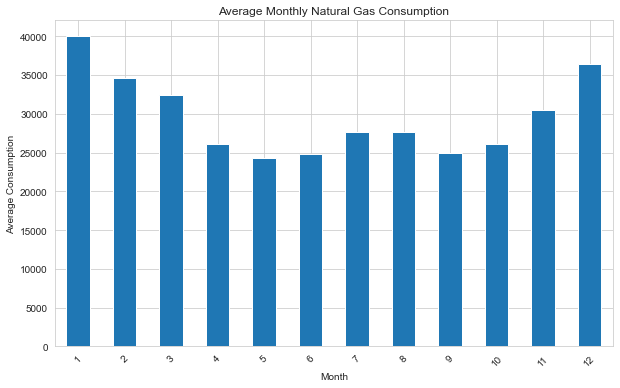

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Analyze trends over time by aggregating data on a monthly basis across all years
monthly_consumption = df.groupby('month')['value'].mean()
plt.figure(figsize=(10, 6))
monthly_consumption.plot(kind='bar')
plt.title('Average Monthly Natural Gas Consumption')
plt.xlabel('Month')
plt.ylabel('Average Consumption')
plt.xticks(rotation=45)
plt.show()

C:\Users\My Laptop\AppData\Local\Temp\ipykernel_3624\1250262017.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_consumption = df.groupby(pd.Grouper(freq='M'))['value'].sum()


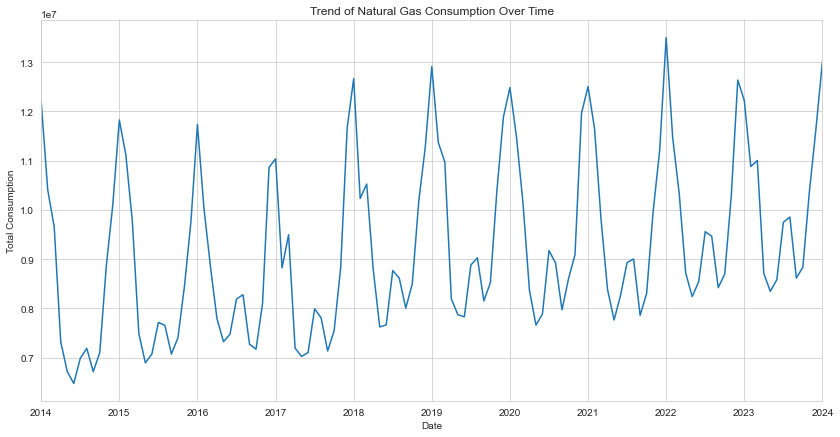

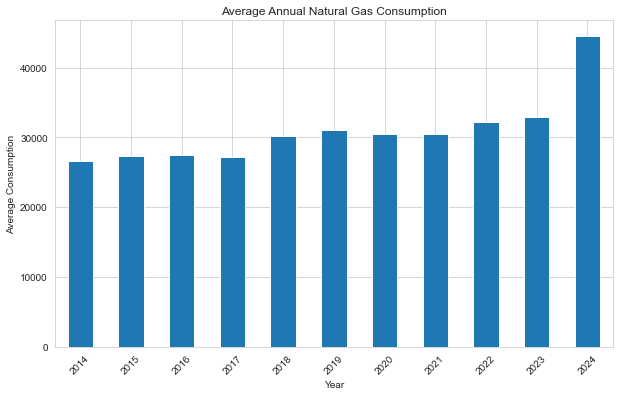

In [5]:
# Convert 'year' and 'month' to a datetime format for easier time series analysis
df['date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))

# Set 'date' as the index
df.set_index('date', inplace=True)

# Group by date and sum up the total consumption for each month
monthly_consumption = df.groupby(pd.Grouper(freq='M'))['value'].sum()

# Plotting the trend of natural gas consumption over time
plt.figure(figsize=(14, 7))
monthly_consumption.plot(title='Trend of Natural Gas Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Total Consumption')
plt.show()


# Calculate the average consumption for each year
yearly_consumption = df.groupby('year')['value'].mean()

# Plotting the trend of average natural gas consumption per year
plt.figure(figsize=(10, 6))
yearly_consumption.plot(kind='bar')
plt.title('Average Annual Natural Gas Consumption')
plt.xlabel('Year')
plt.ylabel('Average Consumption')
plt.xticks(rotation=45)
plt.show()

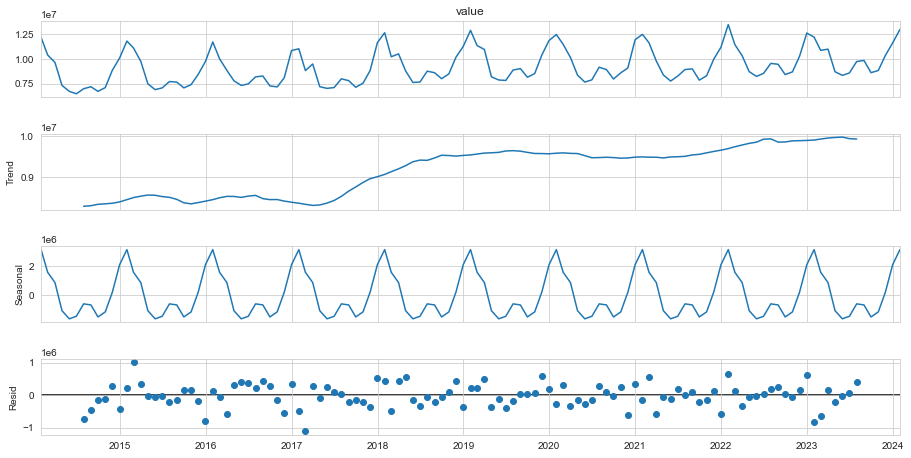

In [6]:
# Seasonal Decomposition to analyze trends, seasonality, and residuals
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(monthly_consumption, model='additive')

# Plotting the decomposed components of the time series
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()

Area with the highest natural gas consumption: TEXAS - 571970195.0
Area with the lowest natural gas consumption: USA-HI - 59968.0
Process with the highest natural gas consumption: Delivered to Consumers - 543148364.0
Process with the lowest natural gas consumption: Vehicle Fuel Consumption - 989544.0


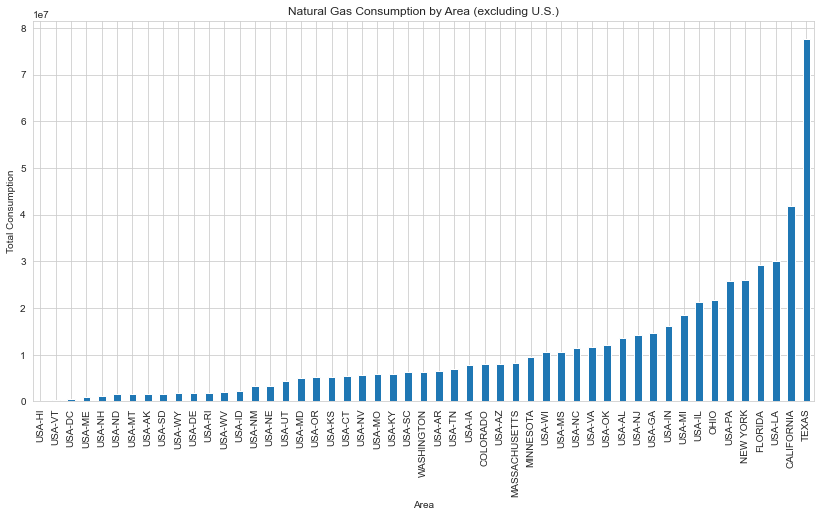

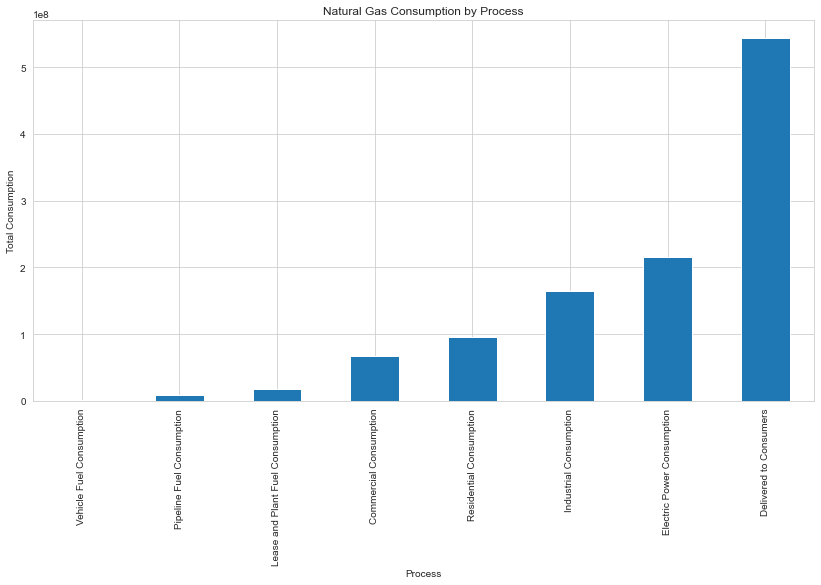

In [7]:
# Grouping data by area and calculating total consumption for each area
area_consumption = df.groupby('area-name')['value'].sum().sort_values()

# Identifying the area with the highest and lowest consumption

# Find the area with the highest consumption (excluding U.S.)
highest_area_consumption = area_consumption.drop('U.S.').idxmax()
lowest_area_consumption = area_consumption.idxmin()

# Find the area with the highest consumption (excluding U.S.)
highest_consumption = area_consumption.drop('U.S.').idxmax()

print(f"Area with the highest natural gas consumption: {highest_area_consumption} - {area_consumption.max()}")
print(f"Area with the lowest natural gas consumption: {lowest_area_consumption} - {area_consumption.min()}")

# Grouping data by process and calculating total consumption for each process
process_consumption = df.groupby('process-name')['value'].sum().sort_values()

# Identifying the process with the highest and lowest consumption
highest_process_consumption = process_consumption.idxmax()
lowest_process_consumption = process_consumption.idxmin()

print(f"Process with the highest natural gas consumption: {highest_process_consumption} - {process_consumption.max()}")
print(f"Process with the lowest natural gas consumption: {lowest_process_consumption} - {process_consumption.min()}")


# Visualizing area consumption (excluding U.S.)
plt.figure(figsize=(14, 7))
area_consumption.drop('U.S.').plot(kind='bar')  # Exclude 'U.S.' using .drop()
plt.title('Natural Gas Consumption by Area (excluding U.S.)')
plt.xlabel('Area')
plt.ylabel('Total Consumption')
plt.show()


# Visualizing process consumption
plt.figure(figsize=(14, 7))
process_consumption.plot(kind='bar')
plt.title('Natural Gas Consumption by Process')
plt.xlabel('Process')
plt.ylabel('Total Consumption')
plt.show()

In [8]:
print("Summary Statistics for Natural Gas Consumption:")
print(summary_statistics)
print("\nArea with the highest natural gas consumption: {} - {}".format(highest_area_consumption, area_consumption.max()))
print("Area with the lowest natural gas consumption: {} - {}".format(lowest_area_consumption, area_consumption.min()))
print("Process with the highest natural gas consumption: {} - {}".format(highest_process_consumption, process_consumption.max()))
print("Process with the lowest natural gas consumption: {} - {}".format(lowest_process_consumption, process_consumption.min()))

Summary Statistics for Natural Gas Consumption:
               year         month         value
count  37994.000000  37994.000000  3.751800e+04
mean    2018.545455      6.454545  2.970826e+04
std        2.903442      3.473677  1.504204e+05
min     2014.000000      1.000000  0.000000e+00
25%     2016.000000      3.000000  8.092500e+02
50%     2019.000000      6.000000  4.380000e+03
75%     2021.000000      9.000000  1.616350e+04
max     2024.000000     12.000000  3.391775e+06

Area with the highest natural gas consumption: TEXAS - 571970195.0
Area with the lowest natural gas consumption: USA-HI - 59968.0
Process with the highest natural gas consumption: Delivered to Consumers - 543148364.0
Process with the lowest natural gas consumption: Vehicle Fuel Consumption - 989544.0


In [9]:
# Handling missing values in the dataset
# First, check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column before imputation:")
print(missing_values)

# For numerical columns, impute missing values with the median of the column
for col in numerical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)

# For categorical columns, impute missing values with the mode (most frequent value) of the column
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

# Check for missing values again to ensure all have been handled
missing_values_after = df.isnull().sum()
print("\nMissing values per column after imputation:")
print(missing_values_after)

Missing values per column before imputation:
year                    0
month                   0
duoarea                 0
area-name               0
product                 0
product-name            0
process                 0
process-name            0
series                  0
series-description      0
value                 476
units                   0
dtype: int64

Missing values per column after imputation:
year                  0
month                 0
duoarea               0
area-name             0
product               0
product-name          0
process               0
process-name          0
series                0
series-description    0
value                 0
units                 0
dtype: int64


C:\Users\My Laptop\AppData\Local\Temp\ipykernel_3624\1764803540.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [10]:
from sklearn.preprocessing import LabelEncoder

# Copy the DataFrame for preprocessing
df_preprocessed = df.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['duoarea', 'area-name', 'product', 'product-name', 'process', 'process-name', 'series', 'series-description', 'units']

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df_preprocessed[col] = label_encoder.fit_transform(df_preprocessed[col])

# Display the first few rows of the preprocessed DataFrame to verify changes
print(df_preprocessed.head())

            year  month  duoarea  area-name  product  product-name  process  \
date                                                                          
2014-01-01  2014      1       10          2        0             0        0   
2014-01-01  2014      1       31         34        0             0        0   
2014-01-01  2014      1       38         39        0             0        0   
2014-01-01  2014      1        9         15        0             0        0   
2014-01-01  2014      1        4         12        0             0        0   

            process-name  series  series-description   value  units  
date                                                                 
2014-01-01             0      61                 167  6605.0      0  
2014-01-01             0      82                 187  1691.0      0  
2014-01-01             0      89                 195  4711.0      0  
2014-01-01             0      60                 166  2128.0      0  
2014-01-01             0  

# XGBRegressor

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import numpy as np

# Preparing the dataset for time series forecasting
# Selecting relevant features for the model
features = ['year', 'month', 'duoarea', 'area-name', 'product', 'product-name', 'process', 'process-name', 'series', 'series-description', 'units']
target = 'value'

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_preprocessed[features], df_preprocessed[target], test_size=0.2, random_state=42)

# Initializing and training the XGBoost regressor model
model1 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model1.fit(X_train, y_train)

# Making predictions on the test set
predictions = model1.predict(X_test)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")

y_pred = model1.predict(X_test)
from sklearn.metrics import r2_score

acc = r2_score(y_test, y_pred)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Root Mean Squared Error (RMSE) on Test Set: 13539.3857374397
R2 score on Test Set: 0.9908143417158436
Mean Squared Error (MSE): 183314966.14718553
Mean Absolute Error (MAE): 5888.3071897826485


In [12]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Mean Absolute Percentage Error (MAPE) on Test Set: 2.3804722121607875e+17


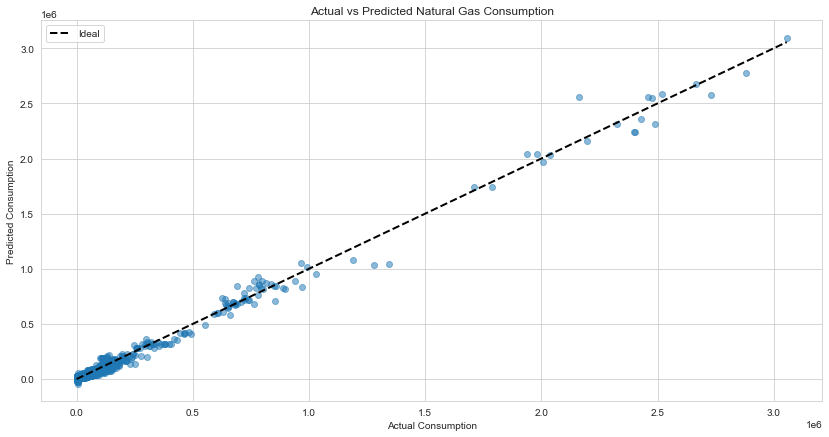

In [13]:
# Visualization of model performance: Actual vs Predicted Consumption
plt.figure(figsize=(14, 7))
plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Actual vs Predicted Natural Gas Consumption')
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.legend()
plt.show()

# RandomForest

In [14]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(n_estimators = 50, max_depth = 15, random_state = 55, n_jobs=-1).fit(X_train, y_train)

In [15]:
# Making predictions on the test set
predictions = model2.predict(X_test)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(y_test, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 8899.672525362836
R2 score on Test Set: 0.9960311890222814
Mean Squared Error (MSE): 79204171.0586981
Mean Absolute Error (MAE): 2445.4979036834334
Mean Absolute Percentage Error (MAPE) on Test Set: 1.040978015073943e+16


# KNN

In [16]:
from sklearn.neighbors import KNeighborsRegressor

model3 = KNeighborsRegressor(n_neighbors=6).fit(X_train, y_train)

In [17]:
# Making predictions on the test set
predictions = model3.predict(X_test)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(y_test, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 10891.242873430188
R2 score on Test Set: 0.9940561581158934
Mean Squared Error (MSE): 118619171.32804385
Mean Absolute Error (MAE): 2484.904175988069
Mean Absolute Percentage Error (MAPE) on Test Set: 5014766185944922.0


# lightgbm

In [18]:
import lightgbm as lgb
model4 = lgb.LGBMRegressor(random_state=42)  
model4.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003967 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 629
[LightGBM] [Info] Number of data points in the train set: 30395, number of used features: 8
[LightGBM] [Info] Start training from score 29753.997434


LGBMRegressor(random_state=42)

In [19]:
# Making predictions on the test set
predictions = model4.predict(X_test)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(y_test, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 12311.56806816737
R2 score on Test Set: 0.9924048019417022
Mean Squared Error (MSE): 151574708.2971184
Mean Absolute Error (MAE): 4622.767434206344
Mean Absolute Percentage Error (MAPE) on Test Set: 2.794116329962462e+17


# AdaBoostRegressor

In [20]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Create an instance of AdaBoostRegressor
base_model = DecisionTreeRegressor(max_depth=11)
model5 = AdaBoostRegressor(base_estimator=base_model, n_estimators=100)

model5.fit(X_train, y_train)

C:\Users\My Laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=11),
                  n_estimators=100)

In [21]:
# Making predictions on the test set
predictions = model5.predict(X_test)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(y_test, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 10510.552363145966
R2 score on Test Set: 0.9944644160351904
Mean Squared Error (MSE): 110471710.97843322
Mean Absolute Error (MAE): 3551.9510128110533
Mean Absolute Percentage Error (MAPE) on Test Set: 4.171285023083776e+16


# CatBoostRegressor

In [22]:
from catboost import CatBoostRegressor
model6 = CatBoostRegressor(iterations=10000, learning_rate=0.1, depth=10)

In [23]:
model6.fit(X_train, y_train)

0:	learn: 138141.3582257	total: 205ms	remaining: 34m 10s
1:	learn: 126139.8492221	total: 231ms	remaining: 19m 12s
2:	learn: 115974.6741593	total: 257ms	remaining: 14m 17s
3:	learn: 106218.1425237	total: 284ms	remaining: 11m 49s
4:	learn: 97384.6847447	total: 301ms	remaining: 10m 1s
5:	learn: 89416.4895467	total: 311ms	remaining: 8m 37s
6:	learn: 82033.2046531	total: 341ms	remaining: 8m 6s
7:	learn: 75282.4408413	total: 371ms	remaining: 7m 43s
8:	learn: 70033.0663341	total: 406ms	remaining: 7m 30s
9:	learn: 64784.6247125	total: 446ms	remaining: 7m 25s
10:	learn: 59841.4843839	total: 483ms	remaining: 7m 18s
11:	learn: 55701.1598147	total: 496ms	remaining: 6m 52s
12:	learn: 51849.2343691	total: 524ms	remaining: 6m 42s
13:	learn: 48363.7041173	total: 555ms	remaining: 6m 35s
14:	learn: 45350.1256669	total: 583ms	remaining: 6m 28s
15:	learn: 42452.1045744	total: 613ms	remaining: 6m 22s
16:	learn: 39935.3788971	total: 645ms	remaining: 6m 18s
17:	learn: 37623.5606595	total: 686ms	remaining: 6m

150:	learn: 8407.2311787	total: 5.14s	remaining: 5m 35s
151:	learn: 8358.3020052	total: 5.18s	remaining: 5m 35s
152:	learn: 8341.7156642	total: 5.22s	remaining: 5m 35s
153:	learn: 8321.4507738	total: 5.27s	remaining: 5m 36s
154:	learn: 8311.3959714	total: 5.31s	remaining: 5m 37s
155:	learn: 8268.8648269	total: 5.34s	remaining: 5m 37s
156:	learn: 8229.9744026	total: 5.39s	remaining: 5m 37s
157:	learn: 8192.5576032	total: 5.42s	remaining: 5m 37s
158:	learn: 8163.9523796	total: 5.47s	remaining: 5m 38s
159:	learn: 8136.9161384	total: 5.5s	remaining: 5m 38s
160:	learn: 8103.5091787	total: 5.54s	remaining: 5m 38s
161:	learn: 8079.3044207	total: 5.57s	remaining: 5m 38s
162:	learn: 8055.1892280	total: 5.61s	remaining: 5m 38s
163:	learn: 8001.4681876	total: 5.64s	remaining: 5m 38s
164:	learn: 7971.6501390	total: 5.68s	remaining: 5m 38s
165:	learn: 7952.1378504	total: 5.71s	remaining: 5m 38s
166:	learn: 7932.0823632	total: 5.74s	remaining: 5m 38s
167:	learn: 7905.6591428	total: 5.78s	remaining: 

302:	learn: 5748.1025915	total: 9.59s	remaining: 5m 6s
303:	learn: 5723.6416635	total: 9.61s	remaining: 5m 6s
304:	learn: 5711.4774582	total: 9.64s	remaining: 5m 6s
305:	learn: 5700.5442491	total: 9.67s	remaining: 5m 6s
306:	learn: 5692.5484796	total: 9.7s	remaining: 5m 6s
307:	learn: 5686.0129390	total: 9.72s	remaining: 5m 5s
308:	learn: 5672.6288179	total: 9.75s	remaining: 5m 5s
309:	learn: 5667.5019366	total: 9.77s	remaining: 5m 5s
310:	learn: 5655.9534617	total: 9.8s	remaining: 5m 5s
311:	learn: 5648.3735598	total: 9.83s	remaining: 5m 5s
312:	learn: 5636.2520483	total: 9.86s	remaining: 5m 5s
313:	learn: 5631.6866618	total: 9.88s	remaining: 5m 4s
314:	learn: 5624.1847187	total: 9.91s	remaining: 5m 4s
315:	learn: 5612.2693927	total: 9.94s	remaining: 5m 4s
316:	learn: 5601.4359449	total: 9.96s	remaining: 5m 4s
317:	learn: 5588.6099458	total: 9.99s	remaining: 5m 4s
318:	learn: 5573.7620688	total: 10s	remaining: 5m 3s
319:	learn: 5570.2229410	total: 10s	remaining: 5m 3s
320:	learn: 5564

457:	learn: 4537.5156416	total: 13.8s	remaining: 4m 47s
458:	learn: 4533.4517311	total: 13.8s	remaining: 4m 47s
459:	learn: 4520.8295108	total: 13.9s	remaining: 4m 47s
460:	learn: 4517.4487778	total: 13.9s	remaining: 4m 47s
461:	learn: 4512.3786746	total: 13.9s	remaining: 4m 47s
462:	learn: 4507.3889370	total: 13.9s	remaining: 4m 47s
463:	learn: 4503.1687617	total: 14s	remaining: 4m 47s
464:	learn: 4496.8908067	total: 14s	remaining: 4m 46s
465:	learn: 4493.7989183	total: 14s	remaining: 4m 46s
466:	learn: 4490.3231576	total: 14.1s	remaining: 4m 46s
467:	learn: 4482.6065142	total: 14.1s	remaining: 4m 46s
468:	learn: 4478.7739876	total: 14.1s	remaining: 4m 46s
469:	learn: 4468.0823755	total: 14.1s	remaining: 4m 46s
470:	learn: 4465.7624799	total: 14.2s	remaining: 4m 46s
471:	learn: 4461.1911268	total: 14.2s	remaining: 4m 46s
472:	learn: 4456.4234855	total: 14.2s	remaining: 4m 46s
473:	learn: 4450.2971641	total: 14.2s	remaining: 4m 46s
474:	learn: 4448.1703323	total: 14.3s	remaining: 4m 46

604:	learn: 3867.8990052	total: 17.8s	remaining: 4m 37s
605:	learn: 3857.5885663	total: 17.9s	remaining: 4m 36s
606:	learn: 3855.1931700	total: 17.9s	remaining: 4m 36s
607:	learn: 3854.9580804	total: 17.9s	remaining: 4m 36s
608:	learn: 3852.0525923	total: 17.9s	remaining: 4m 36s
609:	learn: 3848.8494686	total: 18s	remaining: 4m 36s
610:	learn: 3845.3796666	total: 18s	remaining: 4m 36s
611:	learn: 3844.1203546	total: 18s	remaining: 4m 36s
612:	learn: 3841.7524859	total: 18s	remaining: 4m 36s
613:	learn: 3834.0109534	total: 18.1s	remaining: 4m 36s
614:	learn: 3827.2271752	total: 18.1s	remaining: 4m 36s
615:	learn: 3818.8932319	total: 18.1s	remaining: 4m 35s
616:	learn: 3817.8621182	total: 18.1s	remaining: 4m 35s
617:	learn: 3807.7725731	total: 18.2s	remaining: 4m 35s
618:	learn: 3802.4028404	total: 18.2s	remaining: 4m 35s
619:	learn: 3801.5097573	total: 18.2s	remaining: 4m 35s
620:	learn: 3797.6707796	total: 18.2s	remaining: 4m 35s
621:	learn: 3794.4810136	total: 18.3s	remaining: 4m 35s


755:	learn: 3385.8374243	total: 22.3s	remaining: 4m 32s
756:	learn: 3385.1954778	total: 22.3s	remaining: 4m 32s
757:	learn: 3382.1010952	total: 22.4s	remaining: 4m 32s
758:	learn: 3380.8284928	total: 22.4s	remaining: 4m 32s
759:	learn: 3375.8281418	total: 22.4s	remaining: 4m 32s
760:	learn: 3374.5297416	total: 22.4s	remaining: 4m 32s
761:	learn: 3374.4710416	total: 22.4s	remaining: 4m 32s
762:	learn: 3368.3532779	total: 22.5s	remaining: 4m 32s
763:	learn: 3361.7089812	total: 22.5s	remaining: 4m 32s
764:	learn: 3358.9015017	total: 22.5s	remaining: 4m 32s
765:	learn: 3355.2470934	total: 22.6s	remaining: 4m 32s
766:	learn: 3353.5629382	total: 22.6s	remaining: 4m 32s
767:	learn: 3349.3328673	total: 22.7s	remaining: 4m 32s
768:	learn: 3348.2236053	total: 22.7s	remaining: 4m 32s
769:	learn: 3346.9717014	total: 22.8s	remaining: 4m 33s
770:	learn: 3345.6094510	total: 22.9s	remaining: 4m 33s
771:	learn: 3341.6311664	total: 22.9s	remaining: 4m 33s
772:	learn: 3336.8984707	total: 23s	remaining: 4

903:	learn: 2998.6597335	total: 31.1s	remaining: 5m 13s
904:	learn: 2998.4760926	total: 31.1s	remaining: 5m 12s
905:	learn: 2993.8297048	total: 31.2s	remaining: 5m 12s
906:	learn: 2992.8359684	total: 31.2s	remaining: 5m 12s
907:	learn: 2988.6101638	total: 31.3s	remaining: 5m 13s
908:	learn: 2986.9831564	total: 31.3s	remaining: 5m 13s
909:	learn: 2984.1173026	total: 31.3s	remaining: 5m 13s
910:	learn: 2982.5340287	total: 31.4s	remaining: 5m 13s
911:	learn: 2980.2928750	total: 31.4s	remaining: 5m 13s
912:	learn: 2978.3604994	total: 31.5s	remaining: 5m 13s
913:	learn: 2975.6684750	total: 31.5s	remaining: 5m 13s
914:	learn: 2970.3226308	total: 31.6s	remaining: 5m 13s
915:	learn: 2968.4530450	total: 31.6s	remaining: 5m 13s
916:	learn: 2967.2209242	total: 31.7s	remaining: 5m 13s
917:	learn: 2965.8456430	total: 31.7s	remaining: 5m 13s
918:	learn: 2963.8272412	total: 31.8s	remaining: 5m 13s
919:	learn: 2961.8666781	total: 31.8s	remaining: 5m 13s
920:	learn: 2958.7421854	total: 31.8s	remaining:

1050:	learn: 2697.9983020	total: 37.8s	remaining: 5m 21s
1051:	learn: 2697.5670239	total: 37.9s	remaining: 5m 22s
1052:	learn: 2695.5314207	total: 37.9s	remaining: 5m 22s
1053:	learn: 2693.9670285	total: 38s	remaining: 5m 22s
1054:	learn: 2692.1798879	total: 38s	remaining: 5m 22s
1055:	learn: 2691.4211586	total: 38.1s	remaining: 5m 22s
1056:	learn: 2690.7939750	total: 38.1s	remaining: 5m 22s
1057:	learn: 2688.7998334	total: 38.2s	remaining: 5m 22s
1058:	learn: 2683.7440210	total: 38.2s	remaining: 5m 22s
1059:	learn: 2680.7081267	total: 38.3s	remaining: 5m 23s
1060:	learn: 2679.7631489	total: 38.4s	remaining: 5m 23s
1061:	learn: 2676.7003254	total: 38.4s	remaining: 5m 23s
1062:	learn: 2675.8593028	total: 38.4s	remaining: 5m 23s
1063:	learn: 2673.7039432	total: 38.5s	remaining: 5m 23s
1064:	learn: 2673.1567322	total: 38.5s	remaining: 5m 23s
1065:	learn: 2672.7698702	total: 38.5s	remaining: 5m 23s
1066:	learn: 2670.9291164	total: 38.6s	remaining: 5m 23s
1067:	learn: 2670.6866905	total: 38

1198:	learn: 2470.3227824	total: 43.4s	remaining: 5m 18s
1199:	learn: 2467.4963440	total: 43.4s	remaining: 5m 18s
1200:	learn: 2467.4792473	total: 43.4s	remaining: 5m 18s
1201:	learn: 2465.9330398	total: 43.5s	remaining: 5m 18s
1202:	learn: 2464.0087529	total: 43.5s	remaining: 5m 18s
1203:	learn: 2460.8220468	total: 43.5s	remaining: 5m 18s
1204:	learn: 2460.0038290	total: 43.6s	remaining: 5m 18s
1205:	learn: 2457.6425532	total: 43.6s	remaining: 5m 18s
1206:	learn: 2456.1556984	total: 43.7s	remaining: 5m 18s
1207:	learn: 2455.6129653	total: 43.7s	remaining: 5m 18s
1208:	learn: 2454.9076077	total: 43.7s	remaining: 5m 18s
1209:	learn: 2452.6034072	total: 43.8s	remaining: 5m 18s
1210:	learn: 2450.3870609	total: 43.8s	remaining: 5m 18s
1211:	learn: 2449.6955129	total: 43.9s	remaining: 5m 18s
1212:	learn: 2448.3788997	total: 43.9s	remaining: 5m 18s
1213:	learn: 2446.4751061	total: 44s	remaining: 5m 18s
1214:	learn: 2444.3103387	total: 44s	remaining: 5m 18s
1215:	learn: 2443.7762439	total: 44

1345:	learn: 2287.1148993	total: 48.1s	remaining: 5m 9s
1346:	learn: 2286.1619258	total: 48.1s	remaining: 5m 9s
1347:	learn: 2286.0847166	total: 48.1s	remaining: 5m 8s
1348:	learn: 2285.3157025	total: 48.2s	remaining: 5m 8s
1349:	learn: 2283.6813333	total: 48.2s	remaining: 5m 8s
1350:	learn: 2283.2780907	total: 48.2s	remaining: 5m 8s
1351:	learn: 2281.7615614	total: 48.3s	remaining: 5m 8s
1352:	learn: 2281.3433069	total: 48.3s	remaining: 5m 8s
1353:	learn: 2279.5984810	total: 48.3s	remaining: 5m 8s
1354:	learn: 2278.4514151	total: 48.4s	remaining: 5m 8s
1355:	learn: 2275.9161093	total: 48.4s	remaining: 5m 8s
1356:	learn: 2274.8387255	total: 48.4s	remaining: 5m 8s
1357:	learn: 2273.4802948	total: 48.5s	remaining: 5m 8s
1358:	learn: 2273.0052660	total: 48.5s	remaining: 5m 8s
1359:	learn: 2272.2727165	total: 48.5s	remaining: 5m 8s
1360:	learn: 2271.2614568	total: 48.6s	remaining: 5m 8s
1361:	learn: 2270.9176374	total: 48.6s	remaining: 5m 8s
1362:	learn: 2269.9578696	total: 48.6s	remaining

1498:	learn: 2129.8776638	total: 52.7s	remaining: 4m 58s
1499:	learn: 2129.2371533	total: 52.7s	remaining: 4m 58s
1500:	learn: 2128.3908085	total: 52.8s	remaining: 4m 58s
1501:	learn: 2127.9571035	total: 52.8s	remaining: 4m 58s
1502:	learn: 2126.7482316	total: 52.8s	remaining: 4m 58s
1503:	learn: 2125.7613875	total: 52.9s	remaining: 4m 58s
1504:	learn: 2124.8527541	total: 52.9s	remaining: 4m 58s
1505:	learn: 2124.0154016	total: 52.9s	remaining: 4m 58s
1506:	learn: 2123.0879240	total: 52.9s	remaining: 4m 58s
1507:	learn: 2120.5937355	total: 53s	remaining: 4m 58s
1508:	learn: 2119.8242485	total: 53s	remaining: 4m 58s
1509:	learn: 2116.3021066	total: 53s	remaining: 4m 58s
1510:	learn: 2115.7469138	total: 53.1s	remaining: 4m 58s
1511:	learn: 2114.4596504	total: 53.1s	remaining: 4m 58s
1512:	learn: 2113.6280745	total: 53.1s	remaining: 4m 57s
1513:	learn: 2112.9583811	total: 53.1s	remaining: 4m 57s
1514:	learn: 2112.1082529	total: 53.2s	remaining: 4m 57s
1515:	learn: 2110.8944954	total: 53.2

1650:	learn: 1982.1452420	total: 57.4s	remaining: 4m 50s
1651:	learn: 1980.4096069	total: 57.5s	remaining: 4m 50s
1652:	learn: 1980.0202093	total: 57.5s	remaining: 4m 50s
1653:	learn: 1979.7246619	total: 57.5s	remaining: 4m 50s
1654:	learn: 1979.1504358	total: 57.5s	remaining: 4m 50s
1655:	learn: 1978.3570435	total: 57.6s	remaining: 4m 50s
1656:	learn: 1977.9074244	total: 57.6s	remaining: 4m 49s
1657:	learn: 1977.2942174	total: 57.6s	remaining: 4m 49s
1658:	learn: 1976.5942343	total: 57.7s	remaining: 4m 49s
1659:	learn: 1975.9108580	total: 57.7s	remaining: 4m 49s
1660:	learn: 1973.4822177	total: 57.7s	remaining: 4m 49s
1661:	learn: 1972.8784705	total: 57.7s	remaining: 4m 49s
1662:	learn: 1972.5689345	total: 57.8s	remaining: 4m 49s
1663:	learn: 1972.3265524	total: 57.8s	remaining: 4m 49s
1664:	learn: 1971.3088649	total: 57.8s	remaining: 4m 49s
1665:	learn: 1970.4955710	total: 57.9s	remaining: 4m 49s
1666:	learn: 1969.8992642	total: 57.9s	remaining: 4m 49s
1667:	learn: 1969.5429653	total

1802:	learn: 1878.3149598	total: 1m 1s	remaining: 4m 41s
1803:	learn: 1877.8774805	total: 1m 1s	remaining: 4m 41s
1804:	learn: 1876.5619954	total: 1m 2s	remaining: 4m 41s
1805:	learn: 1875.9039583	total: 1m 2s	remaining: 4m 41s
1806:	learn: 1875.2654624	total: 1m 2s	remaining: 4m 41s
1807:	learn: 1875.0276387	total: 1m 2s	remaining: 4m 41s
1808:	learn: 1873.2385408	total: 1m 2s	remaining: 4m 41s
1809:	learn: 1871.6813502	total: 1m 2s	remaining: 4m 41s
1810:	learn: 1871.1561109	total: 1m 2s	remaining: 4m 41s
1811:	learn: 1870.7341367	total: 1m 2s	remaining: 4m 41s
1812:	learn: 1870.1828677	total: 1m 2s	remaining: 4m 41s
1813:	learn: 1868.9363671	total: 1m 2s	remaining: 4m 41s
1814:	learn: 1868.7433081	total: 1m 2s	remaining: 4m 40s
1815:	learn: 1868.6504794	total: 1m 2s	remaining: 4m 40s
1816:	learn: 1866.6852338	total: 1m 2s	remaining: 4m 40s
1817:	learn: 1865.0621480	total: 1m 2s	remaining: 4m 40s
1818:	learn: 1864.7224698	total: 1m 2s	remaining: 4m 40s
1819:	learn: 1863.1641958	total

1946:	learn: 1775.7941087	total: 1m 6s	remaining: 4m 33s
1947:	learn: 1775.6931061	total: 1m 6s	remaining: 4m 33s
1948:	learn: 1775.0477298	total: 1m 6s	remaining: 4m 33s
1949:	learn: 1773.2486161	total: 1m 6s	remaining: 4m 33s
1950:	learn: 1772.6783069	total: 1m 6s	remaining: 4m 33s
1951:	learn: 1772.5462708	total: 1m 6s	remaining: 4m 33s
1952:	learn: 1771.9543633	total: 1m 6s	remaining: 4m 33s
1953:	learn: 1771.0569749	total: 1m 6s	remaining: 4m 33s
1954:	learn: 1770.7377083	total: 1m 6s	remaining: 4m 33s
1955:	learn: 1769.3330828	total: 1m 6s	remaining: 4m 33s
1956:	learn: 1768.6337560	total: 1m 6s	remaining: 4m 33s
1957:	learn: 1767.5930786	total: 1m 6s	remaining: 4m 33s
1958:	learn: 1766.7083437	total: 1m 6s	remaining: 4m 33s
1959:	learn: 1766.1546957	total: 1m 6s	remaining: 4m 33s
1960:	learn: 1765.1217044	total: 1m 6s	remaining: 4m 33s
1961:	learn: 1763.9478892	total: 1m 6s	remaining: 4m 32s
1962:	learn: 1763.2163710	total: 1m 6s	remaining: 4m 32s
1963:	learn: 1763.0449699	total

2095:	learn: 1693.7356908	total: 1m 10s	remaining: 4m 25s
2096:	learn: 1693.6133102	total: 1m 10s	remaining: 4m 25s
2097:	learn: 1693.1890215	total: 1m 10s	remaining: 4m 25s
2098:	learn: 1692.5959208	total: 1m 10s	remaining: 4m 25s
2099:	learn: 1691.6910484	total: 1m 10s	remaining: 4m 25s
2100:	learn: 1691.1973129	total: 1m 10s	remaining: 4m 25s
2101:	learn: 1690.4710023	total: 1m 10s	remaining: 4m 25s
2102:	learn: 1690.2998607	total: 1m 10s	remaining: 4m 25s
2103:	learn: 1689.6959576	total: 1m 10s	remaining: 4m 25s
2104:	learn: 1688.7532892	total: 1m 10s	remaining: 4m 25s
2105:	learn: 1687.8725905	total: 1m 10s	remaining: 4m 25s
2106:	learn: 1687.7464901	total: 1m 10s	remaining: 4m 25s
2107:	learn: 1687.1284290	total: 1m 10s	remaining: 4m 25s
2108:	learn: 1686.6589868	total: 1m 10s	remaining: 4m 25s
2109:	learn: 1685.5605172	total: 1m 10s	remaining: 4m 25s
2110:	learn: 1684.6788256	total: 1m 10s	remaining: 4m 25s
2111:	learn: 1683.9471894	total: 1m 11s	remaining: 4m 25s
2112:	learn: 1

2238:	learn: 1618.4728184	total: 1m 14s	remaining: 4m 19s
2239:	learn: 1617.3045232	total: 1m 14s	remaining: 4m 19s
2240:	learn: 1617.0076463	total: 1m 14s	remaining: 4m 19s
2241:	learn: 1616.5541702	total: 1m 14s	remaining: 4m 19s
2242:	learn: 1616.4276259	total: 1m 14s	remaining: 4m 19s
2243:	learn: 1615.5989987	total: 1m 14s	remaining: 4m 19s
2244:	learn: 1615.1325289	total: 1m 14s	remaining: 4m 18s
2245:	learn: 1614.8881049	total: 1m 14s	remaining: 4m 18s
2246:	learn: 1614.3563289	total: 1m 15s	remaining: 4m 18s
2247:	learn: 1613.5411490	total: 1m 15s	remaining: 4m 18s
2248:	learn: 1613.1521897	total: 1m 15s	remaining: 4m 18s
2249:	learn: 1612.7993390	total: 1m 15s	remaining: 4m 18s
2250:	learn: 1612.1733538	total: 1m 15s	remaining: 4m 18s
2251:	learn: 1611.7046928	total: 1m 15s	remaining: 4m 18s
2252:	learn: 1611.4487817	total: 1m 15s	remaining: 4m 18s
2253:	learn: 1610.7484814	total: 1m 15s	remaining: 4m 18s
2254:	learn: 1610.5075371	total: 1m 15s	remaining: 4m 18s
2255:	learn: 1

2386:	learn: 1550.2735960	total: 1m 19s	remaining: 4m 12s
2387:	learn: 1549.8848211	total: 1m 19s	remaining: 4m 12s
2388:	learn: 1549.3363635	total: 1m 19s	remaining: 4m 12s
2389:	learn: 1548.7660846	total: 1m 19s	remaining: 4m 12s
2390:	learn: 1548.3886106	total: 1m 19s	remaining: 4m 12s
2391:	learn: 1548.3335904	total: 1m 19s	remaining: 4m 11s
2392:	learn: 1547.6690204	total: 1m 19s	remaining: 4m 11s
2393:	learn: 1547.6182822	total: 1m 19s	remaining: 4m 11s
2394:	learn: 1547.1716994	total: 1m 19s	remaining: 4m 11s
2395:	learn: 1546.9956337	total: 1m 19s	remaining: 4m 11s
2396:	learn: 1546.8021932	total: 1m 19s	remaining: 4m 11s
2397:	learn: 1546.4408047	total: 1m 19s	remaining: 4m 11s
2398:	learn: 1545.8578383	total: 1m 19s	remaining: 4m 11s
2399:	learn: 1545.8030957	total: 1m 19s	remaining: 4m 11s
2400:	learn: 1545.3862884	total: 1m 19s	remaining: 4m 11s
2401:	learn: 1545.0811886	total: 1m 19s	remaining: 4m 11s
2402:	learn: 1544.1198159	total: 1m 19s	remaining: 4m 11s
2403:	learn: 1

2533:	learn: 1486.4153423	total: 1m 23s	remaining: 4m 5s
2534:	learn: 1485.8649773	total: 1m 23s	remaining: 4m 5s
2535:	learn: 1485.6863249	total: 1m 23s	remaining: 4m 5s
2536:	learn: 1485.3537170	total: 1m 23s	remaining: 4m 5s
2537:	learn: 1484.8337977	total: 1m 23s	remaining: 4m 5s
2538:	learn: 1484.4580752	total: 1m 23s	remaining: 4m 5s
2539:	learn: 1484.4068544	total: 1m 23s	remaining: 4m 5s
2540:	learn: 1484.2110342	total: 1m 23s	remaining: 4m 5s
2541:	learn: 1484.1337326	total: 1m 23s	remaining: 4m 5s
2542:	learn: 1483.7558128	total: 1m 23s	remaining: 4m 5s
2543:	learn: 1483.1246239	total: 1m 23s	remaining: 4m 5s
2544:	learn: 1482.8653860	total: 1m 23s	remaining: 4m 4s
2545:	learn: 1482.5015434	total: 1m 23s	remaining: 4m 4s
2546:	learn: 1482.2924628	total: 1m 23s	remaining: 4m 4s
2547:	learn: 1481.8238642	total: 1m 23s	remaining: 4m 4s
2548:	learn: 1481.1088304	total: 1m 23s	remaining: 4m 4s
2549:	learn: 1480.6283592	total: 1m 23s	remaining: 4m 4s
2550:	learn: 1480.2002245	total

2685:	learn: 1427.2467766	total: 1m 28s	remaining: 3m 59s
2686:	learn: 1427.1620958	total: 1m 28s	remaining: 3m 59s
2687:	learn: 1426.8712904	total: 1m 28s	remaining: 3m 59s
2688:	learn: 1426.5847895	total: 1m 28s	remaining: 3m 59s
2689:	learn: 1426.5616483	total: 1m 28s	remaining: 3m 59s
2690:	learn: 1426.3772491	total: 1m 28s	remaining: 3m 59s
2691:	learn: 1426.0218660	total: 1m 28s	remaining: 3m 59s
2692:	learn: 1425.8921611	total: 1m 28s	remaining: 3m 59s
2693:	learn: 1425.5605883	total: 1m 28s	remaining: 3m 59s
2694:	learn: 1425.3223916	total: 1m 28s	remaining: 3m 59s
2695:	learn: 1424.8777865	total: 1m 28s	remaining: 3m 59s
2696:	learn: 1424.7476337	total: 1m 28s	remaining: 3m 59s
2697:	learn: 1424.3162053	total: 1m 28s	remaining: 3m 59s
2698:	learn: 1424.2674899	total: 1m 28s	remaining: 3m 59s
2699:	learn: 1424.0560572	total: 1m 28s	remaining: 3m 59s
2700:	learn: 1423.7196840	total: 1m 28s	remaining: 3m 59s
2701:	learn: 1423.4659256	total: 1m 28s	remaining: 3m 59s
2702:	learn: 1

2827:	learn: 1382.5931870	total: 1m 33s	remaining: 3m 55s
2828:	learn: 1382.1491015	total: 1m 33s	remaining: 3m 55s
2829:	learn: 1382.0189947	total: 1m 33s	remaining: 3m 55s
2830:	learn: 1381.7396672	total: 1m 33s	remaining: 3m 55s
2831:	learn: 1381.5440034	total: 1m 33s	remaining: 3m 55s
2832:	learn: 1381.4129766	total: 1m 33s	remaining: 3m 55s
2833:	learn: 1380.8485350	total: 1m 33s	remaining: 3m 55s
2834:	learn: 1380.5609279	total: 1m 33s	remaining: 3m 55s
2835:	learn: 1380.1945357	total: 1m 33s	remaining: 3m 55s
2836:	learn: 1379.9547333	total: 1m 33s	remaining: 3m 55s
2837:	learn: 1379.3456384	total: 1m 33s	remaining: 3m 55s
2838:	learn: 1378.9688137	total: 1m 33s	remaining: 3m 55s
2839:	learn: 1378.2069077	total: 1m 33s	remaining: 3m 55s
2840:	learn: 1377.8558921	total: 1m 33s	remaining: 3m 55s
2841:	learn: 1377.7168600	total: 1m 33s	remaining: 3m 55s
2842:	learn: 1377.2705558	total: 1m 33s	remaining: 3m 55s
2843:	learn: 1376.9073720	total: 1m 33s	remaining: 3m 55s
2844:	learn: 1

2972:	learn: 1335.7691249	total: 1m 37s	remaining: 3m 50s
2973:	learn: 1335.6229559	total: 1m 37s	remaining: 3m 50s
2974:	learn: 1335.5423708	total: 1m 37s	remaining: 3m 50s
2975:	learn: 1335.2739091	total: 1m 37s	remaining: 3m 50s
2976:	learn: 1334.5170408	total: 1m 37s	remaining: 3m 50s
2977:	learn: 1334.2201482	total: 1m 37s	remaining: 3m 50s
2978:	learn: 1333.9788261	total: 1m 37s	remaining: 3m 50s
2979:	learn: 1333.7244778	total: 1m 37s	remaining: 3m 50s
2980:	learn: 1333.4607148	total: 1m 38s	remaining: 3m 50s
2981:	learn: 1333.1728405	total: 1m 38s	remaining: 3m 50s
2982:	learn: 1332.6815875	total: 1m 38s	remaining: 3m 50s
2983:	learn: 1332.5677517	total: 1m 38s	remaining: 3m 50s
2984:	learn: 1332.3015032	total: 1m 38s	remaining: 3m 50s
2985:	learn: 1331.9980505	total: 1m 38s	remaining: 3m 50s
2986:	learn: 1331.7855722	total: 1m 38s	remaining: 3m 50s
2987:	learn: 1331.5383160	total: 1m 38s	remaining: 3m 50s
2988:	learn: 1331.3262163	total: 1m 38s	remaining: 3m 50s
2989:	learn: 1

3117:	learn: 1294.6681624	total: 1m 43s	remaining: 3m 48s
3118:	learn: 1294.2336020	total: 1m 43s	remaining: 3m 48s
3119:	learn: 1294.0039791	total: 1m 43s	remaining: 3m 48s
3120:	learn: 1293.5383147	total: 1m 43s	remaining: 3m 48s
3121:	learn: 1293.2086361	total: 1m 43s	remaining: 3m 48s
3122:	learn: 1292.7792310	total: 1m 43s	remaining: 3m 48s
3123:	learn: 1292.3146696	total: 1m 43s	remaining: 3m 48s
3124:	learn: 1291.9255851	total: 1m 43s	remaining: 3m 48s
3125:	learn: 1291.9036438	total: 1m 44s	remaining: 3m 48s
3126:	learn: 1291.7779148	total: 1m 44s	remaining: 3m 48s
3127:	learn: 1291.0415840	total: 1m 44s	remaining: 3m 48s
3128:	learn: 1290.6971218	total: 1m 44s	remaining: 3m 48s
3129:	learn: 1290.5034531	total: 1m 44s	remaining: 3m 48s
3130:	learn: 1290.3104620	total: 1m 44s	remaining: 3m 48s
3131:	learn: 1289.8821200	total: 1m 44s	remaining: 3m 48s
3132:	learn: 1289.6006217	total: 1m 44s	remaining: 3m 48s
3133:	learn: 1289.2447205	total: 1m 44s	remaining: 3m 48s
3134:	learn: 1

3262:	learn: 1254.1766640	total: 1m 50s	remaining: 3m 47s
3263:	learn: 1254.0980988	total: 1m 50s	remaining: 3m 47s
3264:	learn: 1253.7344337	total: 1m 50s	remaining: 3m 47s
3265:	learn: 1253.5946817	total: 1m 50s	remaining: 3m 47s
3266:	learn: 1253.4616333	total: 1m 50s	remaining: 3m 46s
3267:	learn: 1253.3391227	total: 1m 50s	remaining: 3m 46s
3268:	learn: 1253.1954181	total: 1m 50s	remaining: 3m 46s
3269:	learn: 1252.9287862	total: 1m 50s	remaining: 3m 46s
3270:	learn: 1252.8152899	total: 1m 50s	remaining: 3m 46s
3271:	learn: 1252.7150162	total: 1m 50s	remaining: 3m 46s
3272:	learn: 1252.4055302	total: 1m 50s	remaining: 3m 46s
3273:	learn: 1252.2177801	total: 1m 50s	remaining: 3m 46s
3274:	learn: 1251.9398714	total: 1m 50s	remaining: 3m 46s
3275:	learn: 1251.8220095	total: 1m 50s	remaining: 3m 46s
3276:	learn: 1251.5711075	total: 1m 50s	remaining: 3m 46s
3277:	learn: 1251.3909898	total: 1m 50s	remaining: 3m 46s
3278:	learn: 1251.1417881	total: 1m 50s	remaining: 3m 46s
3279:	learn: 1

3405:	learn: 1215.6206878	total: 1m 55s	remaining: 3m 43s
3406:	learn: 1215.5306656	total: 1m 55s	remaining: 3m 43s
3407:	learn: 1215.2080126	total: 1m 55s	remaining: 3m 43s
3408:	learn: 1214.9502777	total: 1m 55s	remaining: 3m 43s
3409:	learn: 1214.6290831	total: 1m 55s	remaining: 3m 43s
3410:	learn: 1214.1919301	total: 1m 55s	remaining: 3m 43s
3411:	learn: 1214.0124695	total: 1m 55s	remaining: 3m 43s
3412:	learn: 1213.7197987	total: 1m 55s	remaining: 3m 43s
3413:	learn: 1213.4015999	total: 1m 55s	remaining: 3m 43s
3414:	learn: 1213.1439071	total: 1m 55s	remaining: 3m 43s
3415:	learn: 1212.9108924	total: 1m 56s	remaining: 3m 43s
3416:	learn: 1212.6603974	total: 1m 56s	remaining: 3m 43s
3417:	learn: 1212.3654043	total: 1m 56s	remaining: 3m 43s
3418:	learn: 1212.1577686	total: 1m 56s	remaining: 3m 43s
3419:	learn: 1212.0593656	total: 1m 56s	remaining: 3m 43s
3420:	learn: 1211.9565770	total: 1m 56s	remaining: 3m 43s
3421:	learn: 1211.8029189	total: 1m 56s	remaining: 3m 43s
3422:	learn: 1

3550:	learn: 1177.3244837	total: 2m 1s	remaining: 3m 40s
3551:	learn: 1177.1750556	total: 2m 1s	remaining: 3m 40s
3552:	learn: 1176.7800664	total: 2m 1s	remaining: 3m 40s
3553:	learn: 1176.5446665	total: 2m 1s	remaining: 3m 40s
3554:	learn: 1176.1790739	total: 2m 1s	remaining: 3m 40s
3555:	learn: 1175.9824446	total: 2m 1s	remaining: 3m 40s
3556:	learn: 1175.8364259	total: 2m 1s	remaining: 3m 40s
3557:	learn: 1175.5659083	total: 2m 2s	remaining: 3m 40s
3558:	learn: 1175.3780509	total: 2m 2s	remaining: 3m 40s
3559:	learn: 1175.2675922	total: 2m 2s	remaining: 3m 40s
3560:	learn: 1175.1000529	total: 2m 2s	remaining: 3m 40s
3561:	learn: 1175.0459160	total: 2m 2s	remaining: 3m 40s
3562:	learn: 1175.0021660	total: 2m 2s	remaining: 3m 40s
3563:	learn: 1174.6266397	total: 2m 2s	remaining: 3m 40s
3564:	learn: 1174.2193990	total: 2m 2s	remaining: 3m 40s
3565:	learn: 1173.7094932	total: 2m 2s	remaining: 3m 40s
3566:	learn: 1173.2923557	total: 2m 2s	remaining: 3m 40s
3567:	learn: 1172.9503555	total

3694:	learn: 1142.3655717	total: 2m 8s	remaining: 3m 38s
3695:	learn: 1142.1810411	total: 2m 8s	remaining: 3m 38s
3696:	learn: 1142.0688971	total: 2m 8s	remaining: 3m 38s
3697:	learn: 1142.0124040	total: 2m 8s	remaining: 3m 38s
3698:	learn: 1141.8857764	total: 2m 8s	remaining: 3m 38s
3699:	learn: 1141.7641506	total: 2m 8s	remaining: 3m 38s
3700:	learn: 1141.4743002	total: 2m 8s	remaining: 3m 38s
3701:	learn: 1141.2470857	total: 2m 8s	remaining: 3m 38s
3702:	learn: 1140.8460270	total: 2m 8s	remaining: 3m 38s
3703:	learn: 1140.7104669	total: 2m 8s	remaining: 3m 38s
3704:	learn: 1140.4870730	total: 2m 8s	remaining: 3m 38s
3705:	learn: 1140.2417171	total: 2m 8s	remaining: 3m 38s
3706:	learn: 1140.0226804	total: 2m 8s	remaining: 3m 38s
3707:	learn: 1139.7738478	total: 2m 8s	remaining: 3m 38s
3708:	learn: 1139.6473279	total: 2m 8s	remaining: 3m 38s
3709:	learn: 1139.4023330	total: 2m 8s	remaining: 3m 38s
3710:	learn: 1139.1137530	total: 2m 8s	remaining: 3m 38s
3711:	learn: 1138.9618932	total

3837:	learn: 1109.3786210	total: 2m 14s	remaining: 3m 36s
3838:	learn: 1109.2529538	total: 2m 14s	remaining: 3m 36s
3839:	learn: 1109.1661713	total: 2m 14s	remaining: 3m 36s
3840:	learn: 1109.1024921	total: 2m 14s	remaining: 3m 36s
3841:	learn: 1108.8581961	total: 2m 14s	remaining: 3m 36s
3842:	learn: 1108.6660097	total: 2m 14s	remaining: 3m 35s
3843:	learn: 1108.5966725	total: 2m 14s	remaining: 3m 35s
3844:	learn: 1108.0583794	total: 2m 14s	remaining: 3m 36s
3845:	learn: 1107.9406437	total: 2m 15s	remaining: 3m 36s
3846:	learn: 1107.6105431	total: 2m 15s	remaining: 3m 36s
3847:	learn: 1107.3100103	total: 2m 15s	remaining: 3m 36s
3848:	learn: 1107.1839807	total: 2m 15s	remaining: 3m 36s
3849:	learn: 1106.9187630	total: 2m 15s	remaining: 3m 36s
3850:	learn: 1106.6075720	total: 2m 15s	remaining: 3m 35s
3851:	learn: 1106.3479357	total: 2m 15s	remaining: 3m 36s
3852:	learn: 1105.9553824	total: 2m 15s	remaining: 3m 35s
3853:	learn: 1105.6728754	total: 2m 15s	remaining: 3m 35s
3854:	learn: 1

3981:	learn: 1081.3087723	total: 2m 20s	remaining: 3m 32s
3982:	learn: 1081.1552809	total: 2m 20s	remaining: 3m 32s
3983:	learn: 1081.1040771	total: 2m 20s	remaining: 3m 32s
3984:	learn: 1080.9544603	total: 2m 20s	remaining: 3m 32s
3985:	learn: 1080.8519828	total: 2m 20s	remaining: 3m 32s
3986:	learn: 1080.6620948	total: 2m 20s	remaining: 3m 32s
3987:	learn: 1080.5436260	total: 2m 20s	remaining: 3m 32s
3988:	learn: 1080.3525368	total: 2m 20s	remaining: 3m 32s
3989:	learn: 1080.0857067	total: 2m 20s	remaining: 3m 32s
3990:	learn: 1079.9252724	total: 2m 21s	remaining: 3m 32s
3991:	learn: 1079.6575376	total: 2m 21s	remaining: 3m 32s
3992:	learn: 1079.5246726	total: 2m 21s	remaining: 3m 32s
3993:	learn: 1079.4167801	total: 2m 21s	remaining: 3m 32s
3994:	learn: 1079.1898496	total: 2m 21s	remaining: 3m 32s
3995:	learn: 1079.1248531	total: 2m 21s	remaining: 3m 32s
3996:	learn: 1078.8942575	total: 2m 21s	remaining: 3m 32s
3997:	learn: 1078.7621847	total: 2m 21s	remaining: 3m 32s
3998:	learn: 1

4123:	learn: 1054.8965537	total: 2m 25s	remaining: 3m 27s
4124:	learn: 1054.6209253	total: 2m 25s	remaining: 3m 27s
4125:	learn: 1054.3567500	total: 2m 25s	remaining: 3m 26s
4126:	learn: 1054.1897854	total: 2m 25s	remaining: 3m 26s
4127:	learn: 1054.0496662	total: 2m 25s	remaining: 3m 26s
4128:	learn: 1053.8594685	total: 2m 25s	remaining: 3m 26s
4129:	learn: 1053.7839253	total: 2m 25s	remaining: 3m 26s
4130:	learn: 1053.4217671	total: 2m 25s	remaining: 3m 26s
4131:	learn: 1053.3985981	total: 2m 25s	remaining: 3m 26s
4132:	learn: 1053.3099812	total: 2m 25s	remaining: 3m 26s
4133:	learn: 1053.2419157	total: 2m 25s	remaining: 3m 26s
4134:	learn: 1052.9739174	total: 2m 25s	remaining: 3m 26s
4135:	learn: 1052.7255509	total: 2m 25s	remaining: 3m 26s
4136:	learn: 1052.5361336	total: 2m 25s	remaining: 3m 26s
4137:	learn: 1052.3170162	total: 2m 25s	remaining: 3m 26s
4138:	learn: 1052.2131193	total: 2m 25s	remaining: 3m 26s
4139:	learn: 1051.9574088	total: 2m 25s	remaining: 3m 26s
4140:	learn: 1

4267:	learn: 1027.7993408	total: 2m 31s	remaining: 3m 23s
4268:	learn: 1027.5798206	total: 2m 31s	remaining: 3m 23s
4269:	learn: 1027.4852527	total: 2m 31s	remaining: 3m 23s
4270:	learn: 1027.2992768	total: 2m 31s	remaining: 3m 23s
4271:	learn: 1026.9935629	total: 2m 32s	remaining: 3m 23s
4272:	learn: 1026.8422338	total: 2m 32s	remaining: 3m 23s
4273:	learn: 1026.5525521	total: 2m 32s	remaining: 3m 23s
4274:	learn: 1026.3505532	total: 2m 32s	remaining: 3m 23s
4275:	learn: 1026.2921177	total: 2m 32s	remaining: 3m 23s
4276:	learn: 1026.2689881	total: 2m 32s	remaining: 3m 23s
4277:	learn: 1026.1778884	total: 2m 32s	remaining: 3m 23s
4278:	learn: 1026.0937069	total: 2m 32s	remaining: 3m 23s
4279:	learn: 1026.0274024	total: 2m 32s	remaining: 3m 23s
4280:	learn: 1025.9418242	total: 2m 32s	remaining: 3m 23s
4281:	learn: 1025.7347904	total: 2m 32s	remaining: 3m 23s
4282:	learn: 1025.6694419	total: 2m 32s	remaining: 3m 23s
4283:	learn: 1025.5203490	total: 2m 32s	remaining: 3m 23s
4284:	learn: 1

4409:	learn: 1004.1498516	total: 2m 38s	remaining: 3m 20s
4410:	learn: 1003.9654541	total: 2m 38s	remaining: 3m 20s
4411:	learn: 1003.9138768	total: 2m 38s	remaining: 3m 20s
4412:	learn: 1003.8286454	total: 2m 38s	remaining: 3m 20s
4413:	learn: 1003.7033785	total: 2m 38s	remaining: 3m 20s
4414:	learn: 1003.5124813	total: 2m 38s	remaining: 3m 20s
4415:	learn: 1003.4480963	total: 2m 38s	remaining: 3m 20s
4416:	learn: 1003.2715601	total: 2m 38s	remaining: 3m 20s
4417:	learn: 1003.1494917	total: 2m 38s	remaining: 3m 20s
4418:	learn: 1002.9226234	total: 2m 38s	remaining: 3m 20s
4419:	learn: 1002.7542531	total: 2m 38s	remaining: 3m 20s
4420:	learn: 1002.5101453	total: 2m 38s	remaining: 3m 20s
4421:	learn: 1002.2646255	total: 2m 38s	remaining: 3m 20s
4422:	learn: 1002.1338366	total: 2m 38s	remaining: 3m 20s
4423:	learn: 1002.0432828	total: 2m 38s	remaining: 3m 20s
4424:	learn: 1001.7306715	total: 2m 38s	remaining: 3m 20s
4425:	learn: 1001.6194648	total: 2m 38s	remaining: 3m 20s
4426:	learn: 1

4556:	learn: 979.6101990	total: 2m 42s	remaining: 3m 14s
4557:	learn: 979.3375903	total: 2m 42s	remaining: 3m 14s
4558:	learn: 979.1210015	total: 2m 42s	remaining: 3m 14s
4559:	learn: 978.9263529	total: 2m 42s	remaining: 3m 14s
4560:	learn: 978.6623056	total: 2m 42s	remaining: 3m 14s
4561:	learn: 978.5787276	total: 2m 42s	remaining: 3m 14s
4562:	learn: 978.4883997	total: 2m 42s	remaining: 3m 14s
4563:	learn: 978.3396423	total: 2m 43s	remaining: 3m 14s
4564:	learn: 978.1393360	total: 2m 43s	remaining: 3m 14s
4565:	learn: 977.9851093	total: 2m 43s	remaining: 3m 14s
4566:	learn: 977.6454370	total: 2m 43s	remaining: 3m 14s
4567:	learn: 977.5038098	total: 2m 43s	remaining: 3m 14s
4568:	learn: 977.3411401	total: 2m 43s	remaining: 3m 13s
4569:	learn: 977.1716574	total: 2m 43s	remaining: 3m 13s
4570:	learn: 977.0123411	total: 2m 43s	remaining: 3m 13s
4571:	learn: 976.9009221	total: 2m 43s	remaining: 3m 13s
4572:	learn: 976.8013094	total: 2m 43s	remaining: 3m 13s
4573:	learn: 976.5976194	total:

4701:	learn: 958.0937562	total: 2m 47s	remaining: 3m 8s
4702:	learn: 957.9843779	total: 2m 47s	remaining: 3m 8s
4703:	learn: 957.9065571	total: 2m 47s	remaining: 3m 8s
4704:	learn: 957.8879494	total: 2m 47s	remaining: 3m 8s
4705:	learn: 957.7673017	total: 2m 47s	remaining: 3m 8s
4706:	learn: 957.4714239	total: 2m 47s	remaining: 3m 8s
4707:	learn: 957.3165911	total: 2m 47s	remaining: 3m 8s
4708:	learn: 957.1698884	total: 2m 47s	remaining: 3m 8s
4709:	learn: 956.9484062	total: 2m 47s	remaining: 3m 8s
4710:	learn: 956.8088626	total: 2m 47s	remaining: 3m 8s
4711:	learn: 956.7059492	total: 2m 47s	remaining: 3m 8s
4712:	learn: 956.5902917	total: 2m 47s	remaining: 3m 7s
4713:	learn: 956.3597050	total: 2m 47s	remaining: 3m 7s
4714:	learn: 956.2594431	total: 2m 47s	remaining: 3m 7s
4715:	learn: 956.1792671	total: 2m 47s	remaining: 3m 7s
4716:	learn: 955.8840857	total: 2m 47s	remaining: 3m 7s
4717:	learn: 955.5953885	total: 2m 47s	remaining: 3m 7s
4718:	learn: 955.4709572	total: 2m 47s	remaining

4848:	learn: 936.6405202	total: 2m 51s	remaining: 3m 2s
4849:	learn: 936.4502549	total: 2m 51s	remaining: 3m 2s
4850:	learn: 936.3925884	total: 2m 51s	remaining: 3m 2s
4851:	learn: 936.3728151	total: 2m 51s	remaining: 3m 2s
4852:	learn: 936.2866015	total: 2m 51s	remaining: 3m 2s
4853:	learn: 936.2122972	total: 2m 51s	remaining: 3m 2s
4854:	learn: 936.1893425	total: 2m 51s	remaining: 3m 2s
4855:	learn: 936.0664261	total: 2m 52s	remaining: 3m 2s
4856:	learn: 935.8438226	total: 2m 52s	remaining: 3m 2s
4857:	learn: 935.7061667	total: 2m 52s	remaining: 3m 2s
4858:	learn: 935.4874164	total: 2m 52s	remaining: 3m 2s
4859:	learn: 935.1349905	total: 2m 52s	remaining: 3m 2s
4860:	learn: 935.0800573	total: 2m 52s	remaining: 3m 2s
4861:	learn: 934.9137424	total: 2m 52s	remaining: 3m 1s
4862:	learn: 934.8117353	total: 2m 52s	remaining: 3m 1s
4863:	learn: 934.7181929	total: 2m 52s	remaining: 3m 1s
4864:	learn: 934.5899123	total: 2m 52s	remaining: 3m 1s
4865:	learn: 934.4895511	total: 2m 52s	remaining

4996:	learn: 915.0695074	total: 2m 56s	remaining: 2m 56s
4997:	learn: 914.9255443	total: 2m 56s	remaining: 2m 56s
4998:	learn: 914.7805680	total: 2m 56s	remaining: 2m 56s
4999:	learn: 914.6921929	total: 2m 56s	remaining: 2m 56s
5000:	learn: 914.5951783	total: 2m 56s	remaining: 2m 56s
5001:	learn: 914.5084570	total: 2m 56s	remaining: 2m 56s
5002:	learn: 914.4348507	total: 2m 56s	remaining: 2m 56s
5003:	learn: 914.2414270	total: 2m 56s	remaining: 2m 56s
5004:	learn: 914.1333002	total: 2m 56s	remaining: 2m 56s
5005:	learn: 914.1319930	total: 2m 56s	remaining: 2m 56s
5006:	learn: 913.9032596	total: 2m 56s	remaining: 2m 56s
5007:	learn: 913.8777526	total: 2m 57s	remaining: 2m 56s
5008:	learn: 913.8121621	total: 2m 57s	remaining: 2m 56s
5009:	learn: 913.7267850	total: 2m 57s	remaining: 2m 56s
5010:	learn: 913.5626143	total: 2m 57s	remaining: 2m 56s
5011:	learn: 913.3917001	total: 2m 57s	remaining: 2m 56s
5012:	learn: 913.2734387	total: 2m 57s	remaining: 2m 56s
5013:	learn: 913.2132075	total:

5144:	learn: 897.1096534	total: 3m 3s	remaining: 2m 52s
5145:	learn: 897.0219359	total: 3m 3s	remaining: 2m 52s
5146:	learn: 896.8345225	total: 3m 3s	remaining: 2m 52s
5147:	learn: 896.7105845	total: 3m 3s	remaining: 2m 52s
5148:	learn: 896.2492280	total: 3m 3s	remaining: 2m 52s
5149:	learn: 896.1830930	total: 3m 3s	remaining: 2m 52s
5150:	learn: 896.0382425	total: 3m 3s	remaining: 2m 52s
5151:	learn: 895.8833879	total: 3m 3s	remaining: 2m 52s
5152:	learn: 895.8184779	total: 3m 3s	remaining: 2m 52s
5153:	learn: 895.6426799	total: 3m 3s	remaining: 2m 52s
5154:	learn: 895.3745136	total: 3m 3s	remaining: 2m 52s
5155:	learn: 895.3387109	total: 3m 3s	remaining: 2m 52s
5156:	learn: 895.2347677	total: 3m 3s	remaining: 2m 52s
5157:	learn: 895.1042075	total: 3m 3s	remaining: 2m 52s
5158:	learn: 894.9952317	total: 3m 4s	remaining: 2m 52s
5159:	learn: 894.8653733	total: 3m 4s	remaining: 2m 52s
5160:	learn: 894.6280010	total: 3m 4s	remaining: 2m 52s
5161:	learn: 894.4390221	total: 3m 4s	remaining:

5292:	learn: 878.5832037	total: 3m 9s	remaining: 2m 48s
5293:	learn: 878.4847636	total: 3m 9s	remaining: 2m 48s
5294:	learn: 878.3355429	total: 3m 9s	remaining: 2m 48s
5295:	learn: 878.2093185	total: 3m 9s	remaining: 2m 48s
5296:	learn: 877.8915216	total: 3m 9s	remaining: 2m 48s
5297:	learn: 877.7638348	total: 3m 9s	remaining: 2m 48s
5298:	learn: 877.6390429	total: 3m 9s	remaining: 2m 48s
5299:	learn: 877.5598725	total: 3m 9s	remaining: 2m 48s
5300:	learn: 877.3413554	total: 3m 9s	remaining: 2m 48s
5301:	learn: 877.2680935	total: 3m 9s	remaining: 2m 48s
5302:	learn: 876.9949646	total: 3m 9s	remaining: 2m 48s
5303:	learn: 876.8984628	total: 3m 9s	remaining: 2m 48s
5304:	learn: 876.8326469	total: 3m 9s	remaining: 2m 48s
5305:	learn: 876.8266133	total: 3m 9s	remaining: 2m 48s
5306:	learn: 876.5131551	total: 3m 9s	remaining: 2m 47s
5307:	learn: 876.3282714	total: 3m 9s	remaining: 2m 47s
5308:	learn: 876.2271498	total: 3m 9s	remaining: 2m 47s
5309:	learn: 876.1347301	total: 3m 10s	remaining

5437:	learn: 859.4070727	total: 3m 13s	remaining: 2m 42s
5438:	learn: 859.3353769	total: 3m 13s	remaining: 2m 42s
5439:	learn: 859.2199482	total: 3m 13s	remaining: 2m 42s
5440:	learn: 859.0765886	total: 3m 13s	remaining: 2m 42s
5441:	learn: 858.8696488	total: 3m 13s	remaining: 2m 42s
5442:	learn: 858.7118023	total: 3m 13s	remaining: 2m 42s
5443:	learn: 858.5270524	total: 3m 13s	remaining: 2m 42s
5444:	learn: 858.3863025	total: 3m 13s	remaining: 2m 42s
5445:	learn: 858.2068769	total: 3m 13s	remaining: 2m 42s
5446:	learn: 858.1068308	total: 3m 13s	remaining: 2m 42s
5447:	learn: 857.9994892	total: 3m 13s	remaining: 2m 42s
5448:	learn: 857.9378293	total: 3m 14s	remaining: 2m 42s
5449:	learn: 857.8373488	total: 3m 14s	remaining: 2m 41s
5450:	learn: 857.8041573	total: 3m 14s	remaining: 2m 41s
5451:	learn: 857.7196025	total: 3m 14s	remaining: 2m 41s
5452:	learn: 857.6979618	total: 3m 14s	remaining: 2m 41s
5453:	learn: 857.5037075	total: 3m 14s	remaining: 2m 41s
5454:	learn: 857.3999366	total:

5584:	learn: 843.9538605	total: 3m 17s	remaining: 2m 36s
5585:	learn: 843.8924715	total: 3m 17s	remaining: 2m 36s
5586:	learn: 843.8651142	total: 3m 17s	remaining: 2m 36s
5587:	learn: 843.6325477	total: 3m 17s	remaining: 2m 36s
5588:	learn: 843.6285566	total: 3m 18s	remaining: 2m 36s
5589:	learn: 843.4811210	total: 3m 18s	remaining: 2m 36s
5590:	learn: 843.2669252	total: 3m 18s	remaining: 2m 36s
5591:	learn: 843.1758334	total: 3m 18s	remaining: 2m 36s
5592:	learn: 843.1016448	total: 3m 18s	remaining: 2m 36s
5593:	learn: 842.8835336	total: 3m 18s	remaining: 2m 36s
5594:	learn: 842.7989753	total: 3m 18s	remaining: 2m 36s
5595:	learn: 842.6765177	total: 3m 18s	remaining: 2m 35s
5596:	learn: 842.6353438	total: 3m 18s	remaining: 2m 35s
5597:	learn: 842.4757500	total: 3m 18s	remaining: 2m 35s
5598:	learn: 842.3918789	total: 3m 18s	remaining: 2m 35s
5599:	learn: 842.2160114	total: 3m 18s	remaining: 2m 35s
5600:	learn: 842.1190631	total: 3m 18s	remaining: 2m 35s
5601:	learn: 842.0957778	total:

5733:	learn: 827.9458106	total: 3m 22s	remaining: 2m 30s
5734:	learn: 827.7769423	total: 3m 22s	remaining: 2m 30s
5735:	learn: 827.6164737	total: 3m 22s	remaining: 2m 30s
5736:	learn: 827.5533089	total: 3m 22s	remaining: 2m 30s
5737:	learn: 827.5180999	total: 3m 22s	remaining: 2m 30s
5738:	learn: 827.3291886	total: 3m 22s	remaining: 2m 30s
5739:	learn: 827.1131647	total: 3m 22s	remaining: 2m 30s
5740:	learn: 826.8995562	total: 3m 22s	remaining: 2m 30s
5741:	learn: 826.6922152	total: 3m 22s	remaining: 2m 30s
5742:	learn: 826.6048361	total: 3m 22s	remaining: 2m 30s
5743:	learn: 826.5637453	total: 3m 22s	remaining: 2m 30s
5744:	learn: 826.5340426	total: 3m 22s	remaining: 2m 29s
5745:	learn: 826.3554219	total: 3m 22s	remaining: 2m 29s
5746:	learn: 826.2776076	total: 3m 22s	remaining: 2m 29s
5747:	learn: 826.2268913	total: 3m 22s	remaining: 2m 29s
5748:	learn: 826.1525830	total: 3m 22s	remaining: 2m 29s
5749:	learn: 826.0694722	total: 3m 22s	remaining: 2m 29s
5750:	learn: 825.8915567	total:

5883:	learn: 811.1509689	total: 3m 26s	remaining: 2m 24s
5884:	learn: 810.9712698	total: 3m 26s	remaining: 2m 24s
5885:	learn: 810.8069587	total: 3m 26s	remaining: 2m 24s
5886:	learn: 810.7179780	total: 3m 26s	remaining: 2m 24s
5887:	learn: 810.6422165	total: 3m 26s	remaining: 2m 24s
5888:	learn: 810.6302709	total: 3m 26s	remaining: 2m 24s
5889:	learn: 810.5956501	total: 3m 26s	remaining: 2m 24s
5890:	learn: 810.4109592	total: 3m 26s	remaining: 2m 24s
5891:	learn: 810.3129877	total: 3m 26s	remaining: 2m 24s
5892:	learn: 810.1821735	total: 3m 26s	remaining: 2m 24s
5893:	learn: 810.1170660	total: 3m 27s	remaining: 2m 24s
5894:	learn: 809.9527371	total: 3m 27s	remaining: 2m 24s
5895:	learn: 809.9326005	total: 3m 27s	remaining: 2m 24s
5896:	learn: 809.8781412	total: 3m 27s	remaining: 2m 24s
5897:	learn: 809.7199888	total: 3m 27s	remaining: 2m 24s
5898:	learn: 809.5942635	total: 3m 27s	remaining: 2m 24s
5899:	learn: 809.5666538	total: 3m 27s	remaining: 2m 24s
5900:	learn: 809.5599863	total:

6031:	learn: 796.7065996	total: 3m 31s	remaining: 2m 18s
6032:	learn: 796.5870330	total: 3m 31s	remaining: 2m 18s
6033:	learn: 796.5058250	total: 3m 31s	remaining: 2m 18s
6034:	learn: 796.4161431	total: 3m 31s	remaining: 2m 18s
6035:	learn: 796.4042158	total: 3m 31s	remaining: 2m 18s
6036:	learn: 796.3609424	total: 3m 31s	remaining: 2m 18s
6037:	learn: 796.3209686	total: 3m 31s	remaining: 2m 18s
6038:	learn: 796.2885113	total: 3m 31s	remaining: 2m 18s
6039:	learn: 796.2094020	total: 3m 31s	remaining: 2m 18s
6040:	learn: 796.1650666	total: 3m 31s	remaining: 2m 18s
6041:	learn: 796.1327900	total: 3m 31s	remaining: 2m 18s
6042:	learn: 795.9698961	total: 3m 31s	remaining: 2m 18s
6043:	learn: 795.8652529	total: 3m 31s	remaining: 2m 18s
6044:	learn: 795.7352742	total: 3m 31s	remaining: 2m 18s
6045:	learn: 795.7132718	total: 3m 31s	remaining: 2m 18s
6046:	learn: 795.6034389	total: 3m 31s	remaining: 2m 18s
6047:	learn: 795.4630693	total: 3m 31s	remaining: 2m 18s
6048:	learn: 795.3909402	total:

6181:	learn: 782.0823515	total: 3m 35s	remaining: 2m 12s
6182:	learn: 781.9774675	total: 3m 35s	remaining: 2m 12s
6183:	learn: 781.8977897	total: 3m 35s	remaining: 2m 12s
6184:	learn: 781.7816578	total: 3m 35s	remaining: 2m 12s
6185:	learn: 781.6144461	total: 3m 35s	remaining: 2m 12s
6186:	learn: 781.5198632	total: 3m 35s	remaining: 2m 12s
6187:	learn: 781.4230123	total: 3m 35s	remaining: 2m 12s
6188:	learn: 781.4182527	total: 3m 35s	remaining: 2m 12s
6189:	learn: 781.2368269	total: 3m 35s	remaining: 2m 12s
6190:	learn: 781.1871997	total: 3m 35s	remaining: 2m 12s
6191:	learn: 781.0057349	total: 3m 35s	remaining: 2m 12s
6192:	learn: 780.9721354	total: 3m 35s	remaining: 2m 12s
6193:	learn: 780.7832526	total: 3m 35s	remaining: 2m 12s
6194:	learn: 780.7185792	total: 3m 35s	remaining: 2m 12s
6195:	learn: 780.5792930	total: 3m 35s	remaining: 2m 12s
6196:	learn: 780.5680813	total: 3m 35s	remaining: 2m 12s
6197:	learn: 780.4837909	total: 3m 35s	remaining: 2m 12s
6198:	learn: 780.3144401	total:

6332:	learn: 767.1944130	total: 3m 39s	remaining: 2m 7s
6333:	learn: 767.1399598	total: 3m 39s	remaining: 2m 7s
6334:	learn: 767.0668979	total: 3m 39s	remaining: 2m 7s
6335:	learn: 767.0305121	total: 3m 39s	remaining: 2m 7s
6336:	learn: 766.7994985	total: 3m 39s	remaining: 2m 7s
6337:	learn: 766.6055575	total: 3m 39s	remaining: 2m 7s
6338:	learn: 766.5646197	total: 3m 39s	remaining: 2m 6s
6339:	learn: 766.4522213	total: 3m 39s	remaining: 2m 6s
6340:	learn: 766.4078007	total: 3m 39s	remaining: 2m 6s
6341:	learn: 766.3088202	total: 3m 39s	remaining: 2m 6s
6342:	learn: 766.1878139	total: 3m 39s	remaining: 2m 6s
6343:	learn: 766.1074265	total: 3m 39s	remaining: 2m 6s
6344:	learn: 766.0433485	total: 3m 40s	remaining: 2m 6s
6345:	learn: 765.9482521	total: 3m 40s	remaining: 2m 6s
6346:	learn: 765.9361710	total: 3m 40s	remaining: 2m 6s
6347:	learn: 765.9331924	total: 3m 40s	remaining: 2m 6s
6348:	learn: 765.8844536	total: 3m 40s	remaining: 2m 6s
6349:	learn: 765.7897953	total: 3m 40s	remaining

6483:	learn: 753.7627733	total: 3m 43s	remaining: 2m 1s
6484:	learn: 753.6962109	total: 3m 44s	remaining: 2m 1s
6485:	learn: 753.5297729	total: 3m 44s	remaining: 2m 1s
6486:	learn: 753.4569452	total: 3m 44s	remaining: 2m 1s
6487:	learn: 753.3652514	total: 3m 44s	remaining: 2m 1s
6488:	learn: 753.2533626	total: 3m 44s	remaining: 2m 1s
6489:	learn: 753.1688510	total: 3m 44s	remaining: 2m 1s
6490:	learn: 753.1441739	total: 3m 44s	remaining: 2m 1s
6491:	learn: 753.0950829	total: 3m 44s	remaining: 2m 1s
6492:	learn: 753.0432996	total: 3m 44s	remaining: 2m 1s
6493:	learn: 752.9804464	total: 3m 44s	remaining: 2m 1s
6494:	learn: 752.8895513	total: 3m 44s	remaining: 2m 1s
6495:	learn: 752.8015349	total: 3m 44s	remaining: 2m 1s
6496:	learn: 752.7386210	total: 3m 44s	remaining: 2m
6497:	learn: 752.7146549	total: 3m 44s	remaining: 2m
6498:	learn: 752.6312340	total: 3m 44s	remaining: 2m
6499:	learn: 752.4841097	total: 3m 44s	remaining: 2m
6500:	learn: 752.4000187	total: 3m 44s	remaining: 2m
6501:	l

6631:	learn: 741.2399758	total: 3m 48s	remaining: 1m 55s
6632:	learn: 741.1929962	total: 3m 48s	remaining: 1m 55s
6633:	learn: 741.1210494	total: 3m 48s	remaining: 1m 55s
6634:	learn: 741.0454672	total: 3m 48s	remaining: 1m 55s
6635:	learn: 740.8827938	total: 3m 48s	remaining: 1m 55s
6636:	learn: 740.8062026	total: 3m 48s	remaining: 1m 55s
6637:	learn: 740.7422164	total: 3m 48s	remaining: 1m 55s
6638:	learn: 740.6318703	total: 3m 48s	remaining: 1m 55s
6639:	learn: 740.5758476	total: 3m 48s	remaining: 1m 55s
6640:	learn: 740.4812636	total: 3m 48s	remaining: 1m 55s
6641:	learn: 740.4241671	total: 3m 48s	remaining: 1m 55s
6642:	learn: 740.3946861	total: 3m 48s	remaining: 1m 55s
6643:	learn: 740.3185756	total: 3m 48s	remaining: 1m 55s
6644:	learn: 740.2076427	total: 3m 48s	remaining: 1m 55s
6645:	learn: 740.1111482	total: 3m 48s	remaining: 1m 55s
6646:	learn: 740.0578149	total: 3m 48s	remaining: 1m 55s
6647:	learn: 739.9187924	total: 3m 48s	remaining: 1m 55s
6648:	learn: 739.8665078	total:

6780:	learn: 730.0217720	total: 3m 52s	remaining: 1m 50s
6781:	learn: 729.8466107	total: 3m 52s	remaining: 1m 50s
6782:	learn: 729.8264119	total: 3m 52s	remaining: 1m 50s
6783:	learn: 729.8140139	total: 3m 52s	remaining: 1m 50s
6784:	learn: 729.7283130	total: 3m 52s	remaining: 1m 50s
6785:	learn: 729.6738898	total: 3m 52s	remaining: 1m 50s
6786:	learn: 729.6390081	total: 3m 52s	remaining: 1m 50s
6787:	learn: 729.4419844	total: 3m 52s	remaining: 1m 50s
6788:	learn: 729.3599547	total: 3m 52s	remaining: 1m 50s
6789:	learn: 729.2206054	total: 3m 52s	remaining: 1m 50s
6790:	learn: 729.1536902	total: 3m 52s	remaining: 1m 49s
6791:	learn: 729.0656593	total: 3m 52s	remaining: 1m 49s
6792:	learn: 729.0037454	total: 3m 52s	remaining: 1m 49s
6793:	learn: 728.9713917	total: 3m 52s	remaining: 1m 49s
6794:	learn: 728.8474357	total: 3m 52s	remaining: 1m 49s
6795:	learn: 728.7716732	total: 3m 52s	remaining: 1m 49s
6796:	learn: 728.7476890	total: 3m 52s	remaining: 1m 49s
6797:	learn: 728.7018982	total:

6930:	learn: 718.1277320	total: 3m 56s	remaining: 1m 44s
6931:	learn: 718.0649093	total: 3m 56s	remaining: 1m 44s
6932:	learn: 717.9854045	total: 3m 56s	remaining: 1m 44s
6933:	learn: 717.9046474	total: 3m 56s	remaining: 1m 44s
6934:	learn: 717.7904321	total: 3m 56s	remaining: 1m 44s
6935:	learn: 717.7416627	total: 3m 56s	remaining: 1m 44s
6936:	learn: 717.6548267	total: 3m 56s	remaining: 1m 44s
6937:	learn: 717.5702290	total: 3m 56s	remaining: 1m 44s
6938:	learn: 717.5052061	total: 3m 56s	remaining: 1m 44s
6939:	learn: 717.4261708	total: 3m 57s	remaining: 1m 44s
6940:	learn: 717.3234375	total: 3m 57s	remaining: 1m 44s
6941:	learn: 717.2375067	total: 3m 57s	remaining: 1m 44s
6942:	learn: 717.1150854	total: 3m 57s	remaining: 1m 44s
6943:	learn: 717.0782044	total: 3m 57s	remaining: 1m 44s
6944:	learn: 716.9555491	total: 3m 57s	remaining: 1m 44s
6945:	learn: 716.9161052	total: 3m 57s	remaining: 1m 44s
6946:	learn: 716.8413461	total: 3m 57s	remaining: 1m 44s
6947:	learn: 716.7361445	total:

7077:	learn: 705.7382568	total: 4m	remaining: 1m 39s
7078:	learn: 705.6675414	total: 4m 1s	remaining: 1m 39s
7079:	learn: 705.5202814	total: 4m 1s	remaining: 1m 39s
7080:	learn: 705.4989390	total: 4m 1s	remaining: 1m 39s
7081:	learn: 705.4383852	total: 4m 1s	remaining: 1m 39s
7082:	learn: 705.3991421	total: 4m 1s	remaining: 1m 39s
7083:	learn: 705.3645840	total: 4m 1s	remaining: 1m 39s
7084:	learn: 705.3047439	total: 4m 1s	remaining: 1m 39s
7085:	learn: 705.2250299	total: 4m 1s	remaining: 1m 39s
7086:	learn: 705.1761339	total: 4m 1s	remaining: 1m 39s
7087:	learn: 705.0148841	total: 4m 1s	remaining: 1m 39s
7088:	learn: 704.9038101	total: 4m 1s	remaining: 1m 39s
7089:	learn: 704.8384560	total: 4m 1s	remaining: 1m 39s
7090:	learn: 704.8191793	total: 4m 1s	remaining: 1m 39s
7091:	learn: 704.7210064	total: 4m 1s	remaining: 1m 38s
7092:	learn: 704.7070025	total: 4m 1s	remaining: 1m 38s
7093:	learn: 704.6054468	total: 4m 1s	remaining: 1m 38s
7094:	learn: 704.4454373	total: 4m 1s	remaining: 1m

7230:	learn: 693.7657323	total: 4m 5s	remaining: 1m 33s
7231:	learn: 693.7356214	total: 4m 5s	remaining: 1m 33s
7232:	learn: 693.6967019	total: 4m 5s	remaining: 1m 33s
7233:	learn: 693.6342882	total: 4m 5s	remaining: 1m 33s
7234:	learn: 693.6102101	total: 4m 5s	remaining: 1m 33s
7235:	learn: 693.4503834	total: 4m 5s	remaining: 1m 33s
7236:	learn: 693.4132200	total: 4m 5s	remaining: 1m 33s
7237:	learn: 693.3388613	total: 4m 5s	remaining: 1m 33s
7238:	learn: 693.2819948	total: 4m 5s	remaining: 1m 33s
7239:	learn: 693.1892850	total: 4m 5s	remaining: 1m 33s
7240:	learn: 693.0550084	total: 4m 5s	remaining: 1m 33s
7241:	learn: 693.0143465	total: 4m 5s	remaining: 1m 33s
7242:	learn: 692.9388876	total: 4m 5s	remaining: 1m 33s
7243:	learn: 692.8505249	total: 4m 5s	remaining: 1m 33s
7244:	learn: 692.8026537	total: 4m 5s	remaining: 1m 33s
7245:	learn: 692.6637345	total: 4m 5s	remaining: 1m 33s
7246:	learn: 692.6175493	total: 4m 5s	remaining: 1m 33s
7247:	learn: 692.5913149	total: 4m 5s	remaining:

7380:	learn: 682.0703803	total: 4m 9s	remaining: 1m 28s
7381:	learn: 682.0072938	total: 4m 9s	remaining: 1m 28s
7382:	learn: 681.8928351	total: 4m 9s	remaining: 1m 28s
7383:	learn: 681.7789808	total: 4m 9s	remaining: 1m 28s
7384:	learn: 681.7059006	total: 4m 9s	remaining: 1m 28s
7385:	learn: 681.6229456	total: 4m 9s	remaining: 1m 28s
7386:	learn: 681.5534538	total: 4m 9s	remaining: 1m 28s
7387:	learn: 681.5096432	total: 4m 9s	remaining: 1m 28s
7388:	learn: 681.3698176	total: 4m 9s	remaining: 1m 28s
7389:	learn: 681.3237578	total: 4m 10s	remaining: 1m 28s
7390:	learn: 681.2726454	total: 4m 10s	remaining: 1m 28s
7391:	learn: 681.2165988	total: 4m 10s	remaining: 1m 28s
7392:	learn: 681.1818317	total: 4m 10s	remaining: 1m 28s
7393:	learn: 681.0813353	total: 4m 10s	remaining: 1m 28s
7394:	learn: 681.0413786	total: 4m 10s	remaining: 1m 28s
7395:	learn: 680.9941638	total: 4m 10s	remaining: 1m 28s
7396:	learn: 680.9292413	total: 4m 10s	remaining: 1m 28s
7397:	learn: 680.8721867	total: 4m 10s	r

7529:	learn: 671.2549064	total: 4m 14s	remaining: 1m 23s
7530:	learn: 671.1226051	total: 4m 14s	remaining: 1m 23s
7531:	learn: 671.0683240	total: 4m 14s	remaining: 1m 23s
7532:	learn: 671.0278201	total: 4m 14s	remaining: 1m 23s
7533:	learn: 670.9532409	total: 4m 14s	remaining: 1m 23s
7534:	learn: 670.9341005	total: 4m 14s	remaining: 1m 23s
7535:	learn: 670.8956252	total: 4m 14s	remaining: 1m 23s
7536:	learn: 670.8089500	total: 4m 14s	remaining: 1m 23s
7537:	learn: 670.7520356	total: 4m 14s	remaining: 1m 23s
7538:	learn: 670.6863214	total: 4m 14s	remaining: 1m 23s
7539:	learn: 670.6824893	total: 4m 14s	remaining: 1m 22s
7540:	learn: 670.6133944	total: 4m 14s	remaining: 1m 22s
7541:	learn: 670.5872791	total: 4m 14s	remaining: 1m 22s
7542:	learn: 670.5140514	total: 4m 14s	remaining: 1m 22s
7543:	learn: 670.3450120	total: 4m 14s	remaining: 1m 22s
7544:	learn: 670.2732562	total: 4m 14s	remaining: 1m 22s
7545:	learn: 670.1711584	total: 4m 14s	remaining: 1m 22s
7546:	learn: 670.1522781	total:

7675:	learn: 661.1207766	total: 4m 18s	remaining: 1m 18s
7676:	learn: 661.0584303	total: 4m 18s	remaining: 1m 18s
7677:	learn: 660.9987840	total: 4m 18s	remaining: 1m 18s
7678:	learn: 660.8227953	total: 4m 18s	remaining: 1m 18s
7679:	learn: 660.7042667	total: 4m 18s	remaining: 1m 18s
7680:	learn: 660.6376730	total: 4m 18s	remaining: 1m 18s
7681:	learn: 660.5799895	total: 4m 18s	remaining: 1m 17s
7682:	learn: 660.5470923	total: 4m 18s	remaining: 1m 17s
7683:	learn: 660.5036222	total: 4m 18s	remaining: 1m 17s
7684:	learn: 660.3752972	total: 4m 18s	remaining: 1m 17s
7685:	learn: 660.2410545	total: 4m 18s	remaining: 1m 17s
7686:	learn: 660.1267957	total: 4m 18s	remaining: 1m 17s
7687:	learn: 660.0337670	total: 4m 18s	remaining: 1m 17s
7688:	learn: 659.9387653	total: 4m 18s	remaining: 1m 17s
7689:	learn: 659.9060724	total: 4m 18s	remaining: 1m 17s
7690:	learn: 659.8382432	total: 4m 18s	remaining: 1m 17s
7691:	learn: 659.7979359	total: 4m 18s	remaining: 1m 17s
7692:	learn: 659.7698756	total:

7822:	learn: 650.9470503	total: 4m 22s	remaining: 1m 13s
7823:	learn: 650.8819595	total: 4m 22s	remaining: 1m 13s
7824:	learn: 650.8042752	total: 4m 22s	remaining: 1m 12s
7825:	learn: 650.7183233	total: 4m 22s	remaining: 1m 12s
7826:	learn: 650.6769939	total: 4m 22s	remaining: 1m 12s
7827:	learn: 650.6415124	total: 4m 22s	remaining: 1m 12s
7828:	learn: 650.5914767	total: 4m 22s	remaining: 1m 12s
7829:	learn: 650.5874251	total: 4m 22s	remaining: 1m 12s
7830:	learn: 650.4685271	total: 4m 22s	remaining: 1m 12s
7831:	learn: 650.4249713	total: 4m 22s	remaining: 1m 12s
7832:	learn: 650.3464298	total: 4m 22s	remaining: 1m 12s
7833:	learn: 650.2949497	total: 4m 22s	remaining: 1m 12s
7834:	learn: 650.2682659	total: 4m 22s	remaining: 1m 12s
7835:	learn: 650.1995254	total: 4m 22s	remaining: 1m 12s
7836:	learn: 650.1036943	total: 4m 22s	remaining: 1m 12s
7837:	learn: 650.0566355	total: 4m 23s	remaining: 1m 12s
7838:	learn: 649.9306719	total: 4m 23s	remaining: 1m 12s
7839:	learn: 649.8704065	total:

7969:	learn: 641.1901274	total: 4m 26s	remaining: 1m 7s
7970:	learn: 641.0899073	total: 4m 26s	remaining: 1m 7s
7971:	learn: 640.9871080	total: 4m 26s	remaining: 1m 7s
7972:	learn: 640.9078447	total: 4m 27s	remaining: 1m 7s
7973:	learn: 640.8304104	total: 4m 27s	remaining: 1m 7s
7974:	learn: 640.8159064	total: 4m 27s	remaining: 1m 7s
7975:	learn: 640.7941678	total: 4m 27s	remaining: 1m 7s
7976:	learn: 640.7655522	total: 4m 27s	remaining: 1m 7s
7977:	learn: 640.7037868	total: 4m 27s	remaining: 1m 7s
7978:	learn: 640.5966927	total: 4m 27s	remaining: 1m 7s
7979:	learn: 640.5403116	total: 4m 27s	remaining: 1m 7s
7980:	learn: 640.3947676	total: 4m 27s	remaining: 1m 7s
7981:	learn: 640.2908066	total: 4m 27s	remaining: 1m 7s
7982:	learn: 640.1718383	total: 4m 27s	remaining: 1m 7s
7983:	learn: 640.1046424	total: 4m 27s	remaining: 1m 7s
7984:	learn: 640.0135057	total: 4m 27s	remaining: 1m 7s
7985:	learn: 639.8626593	total: 4m 27s	remaining: 1m 7s
7986:	learn: 639.8442651	total: 4m 27s	remaining

8120:	learn: 631.4476300	total: 4m 31s	remaining: 1m 2s
8121:	learn: 631.3923163	total: 4m 31s	remaining: 1m 2s
8122:	learn: 631.3634028	total: 4m 31s	remaining: 1m 2s
8123:	learn: 631.3133851	total: 4m 31s	remaining: 1m 2s
8124:	learn: 631.2805381	total: 4m 31s	remaining: 1m 2s
8125:	learn: 631.2726139	total: 4m 31s	remaining: 1m 2s
8126:	learn: 631.1513757	total: 4m 31s	remaining: 1m 2s
8127:	learn: 631.1021809	total: 4m 31s	remaining: 1m 2s
8128:	learn: 631.0325538	total: 4m 31s	remaining: 1m 2s
8129:	learn: 630.9935319	total: 4m 31s	remaining: 1m 2s
8130:	learn: 630.9256444	total: 4m 31s	remaining: 1m 2s
8131:	learn: 630.9021001	total: 4m 31s	remaining: 1m 2s
8132:	learn: 630.8599604	total: 4m 31s	remaining: 1m 2s
8133:	learn: 630.7142054	total: 4m 31s	remaining: 1m 2s
8134:	learn: 630.6871237	total: 4m 31s	remaining: 1m 2s
8135:	learn: 630.5873981	total: 4m 31s	remaining: 1m 2s
8136:	learn: 630.5247730	total: 4m 31s	remaining: 1m 2s
8137:	learn: 630.5056382	total: 4m 31s	remaining

8275:	learn: 622.0493027	total: 4m 35s	remaining: 57.4s
8276:	learn: 622.0133506	total: 4m 35s	remaining: 57.4s
8277:	learn: 621.9462843	total: 4m 35s	remaining: 57.4s
8278:	learn: 621.9224631	total: 4m 35s	remaining: 57.3s
8279:	learn: 621.8833846	total: 4m 35s	remaining: 57.3s
8280:	learn: 621.8216366	total: 4m 35s	remaining: 57.3s
8281:	learn: 621.7777123	total: 4m 35s	remaining: 57.2s
8282:	learn: 621.7519058	total: 4m 35s	remaining: 57.2s
8283:	learn: 621.7132466	total: 4m 35s	remaining: 57.2s
8284:	learn: 621.6647113	total: 4m 36s	remaining: 57.1s
8285:	learn: 621.6282517	total: 4m 36s	remaining: 57.1s
8286:	learn: 621.5622905	total: 4m 36s	remaining: 57.1s
8287:	learn: 621.4661637	total: 4m 36s	remaining: 57s
8288:	learn: 621.4137381	total: 4m 36s	remaining: 57s
8289:	learn: 621.3731416	total: 4m 36s	remaining: 57s
8290:	learn: 621.3234245	total: 4m 36s	remaining: 56.9s
8291:	learn: 621.2882028	total: 4m 36s	remaining: 56.9s
8292:	learn: 621.2227071	total: 4m 36s	remaining: 56.9

8424:	learn: 613.4117577	total: 4m 40s	remaining: 52.4s
8425:	learn: 613.3580041	total: 4m 40s	remaining: 52.3s
8426:	learn: 613.3344287	total: 4m 40s	remaining: 52.3s
8427:	learn: 613.3095320	total: 4m 40s	remaining: 52.3s
8428:	learn: 613.2763758	total: 4m 40s	remaining: 52.2s
8429:	learn: 613.2253458	total: 4m 40s	remaining: 52.2s
8430:	learn: 613.1121839	total: 4m 40s	remaining: 52.1s
8431:	learn: 613.0079894	total: 4m 40s	remaining: 52.1s
8432:	learn: 612.9078912	total: 4m 40s	remaining: 52.1s
8433:	learn: 612.7634499	total: 4m 40s	remaining: 52s
8434:	learn: 612.7115256	total: 4m 40s	remaining: 52s
8435:	learn: 612.6360727	total: 4m 40s	remaining: 52s
8436:	learn: 612.6292705	total: 4m 40s	remaining: 51.9s
8437:	learn: 612.5266222	total: 4m 40s	remaining: 51.9s
8438:	learn: 612.5131574	total: 4m 40s	remaining: 51.9s
8439:	learn: 612.4914097	total: 4m 40s	remaining: 51.8s
8440:	learn: 612.4243425	total: 4m 40s	remaining: 51.8s
8441:	learn: 612.4023520	total: 4m 40s	remaining: 51.8

8574:	learn: 604.6621818	total: 4m 44s	remaining: 47.3s
8575:	learn: 604.6211662	total: 4m 44s	remaining: 47.2s
8576:	learn: 604.5703038	total: 4m 44s	remaining: 47.2s
8577:	learn: 604.4995290	total: 4m 44s	remaining: 47.2s
8578:	learn: 604.4649434	total: 4m 44s	remaining: 47.1s
8579:	learn: 604.4551793	total: 4m 44s	remaining: 47.1s
8580:	learn: 604.3431731	total: 4m 44s	remaining: 47.1s
8581:	learn: 604.3273847	total: 4m 44s	remaining: 47s
8582:	learn: 604.2487759	total: 4m 44s	remaining: 47s
8583:	learn: 604.2186568	total: 4m 44s	remaining: 47s
8584:	learn: 604.1416050	total: 4m 44s	remaining: 46.9s
8585:	learn: 604.0864864	total: 4m 44s	remaining: 46.9s
8586:	learn: 604.0594161	total: 4m 44s	remaining: 46.9s
8587:	learn: 603.9846964	total: 4m 44s	remaining: 46.8s
8588:	learn: 603.9596400	total: 4m 44s	remaining: 46.8s
8589:	learn: 603.9010708	total: 4m 44s	remaining: 46.8s
8590:	learn: 603.8518860	total: 4m 44s	remaining: 46.7s
8591:	learn: 603.8303300	total: 4m 44s	remaining: 46.7

8725:	learn: 596.3954296	total: 4m 48s	remaining: 42.2s
8726:	learn: 596.3625719	total: 4m 48s	remaining: 42.1s
8727:	learn: 596.3152084	total: 4m 48s	remaining: 42.1s
8728:	learn: 596.2862217	total: 4m 48s	remaining: 42.1s
8729:	learn: 596.1358069	total: 4m 48s	remaining: 42s
8730:	learn: 595.9497528	total: 4m 48s	remaining: 42s
8731:	learn: 595.9446805	total: 4m 48s	remaining: 42s
8732:	learn: 595.9138036	total: 4m 48s	remaining: 41.9s
8733:	learn: 595.8731304	total: 4m 48s	remaining: 41.9s
8734:	learn: 595.8507952	total: 4m 49s	remaining: 41.9s
8735:	learn: 595.8240848	total: 4m 49s	remaining: 41.8s
8736:	learn: 595.7421913	total: 4m 49s	remaining: 41.8s
8737:	learn: 595.7179162	total: 4m 49s	remaining: 41.8s
8738:	learn: 595.6731851	total: 4m 49s	remaining: 41.7s
8739:	learn: 595.5652907	total: 4m 49s	remaining: 41.7s
8740:	learn: 595.4618880	total: 4m 49s	remaining: 41.6s
8741:	learn: 595.3954897	total: 4m 49s	remaining: 41.6s
8742:	learn: 595.3368611	total: 4m 49s	remaining: 41.6

8873:	learn: 588.0291499	total: 4m 53s	remaining: 37.2s
8874:	learn: 587.9508483	total: 4m 53s	remaining: 37.2s
8875:	learn: 587.8660116	total: 4m 53s	remaining: 37.2s
8876:	learn: 587.8229533	total: 4m 53s	remaining: 37.1s
8877:	learn: 587.7970474	total: 4m 53s	remaining: 37.1s
8878:	learn: 587.7665230	total: 4m 53s	remaining: 37.1s
8879:	learn: 587.7379355	total: 4m 53s	remaining: 37s
8880:	learn: 587.7247432	total: 4m 53s	remaining: 37s
8881:	learn: 587.6768774	total: 4m 53s	remaining: 37s
8882:	learn: 587.6238478	total: 4m 53s	remaining: 36.9s
8883:	learn: 587.5576100	total: 4m 53s	remaining: 36.9s
8884:	learn: 587.5036912	total: 4m 53s	remaining: 36.9s
8885:	learn: 587.4485427	total: 4m 53s	remaining: 36.8s
8886:	learn: 587.3217828	total: 4m 53s	remaining: 36.8s
8887:	learn: 587.2792468	total: 4m 53s	remaining: 36.8s
8888:	learn: 587.1265810	total: 4m 53s	remaining: 36.7s
8889:	learn: 587.0806030	total: 4m 53s	remaining: 36.7s
8890:	learn: 587.0000909	total: 4m 53s	remaining: 36.7

9023:	learn: 580.1031686	total: 4m 57s	remaining: 32.2s
9024:	learn: 580.0721510	total: 4m 57s	remaining: 32.2s
9025:	learn: 580.0449962	total: 4m 57s	remaining: 32.2s
9026:	learn: 579.9657201	total: 4m 58s	remaining: 32.1s
9027:	learn: 579.8407956	total: 4m 58s	remaining: 32.1s
9028:	learn: 579.7542568	total: 4m 58s	remaining: 32.1s
9029:	learn: 579.6996698	total: 4m 58s	remaining: 32s
9030:	learn: 579.6552113	total: 4m 58s	remaining: 32s
9031:	learn: 579.6130651	total: 4m 58s	remaining: 32s
9032:	learn: 579.5985929	total: 4m 58s	remaining: 31.9s
9033:	learn: 579.5497879	total: 4m 58s	remaining: 31.9s
9034:	learn: 579.4591000	total: 4m 58s	remaining: 31.9s
9035:	learn: 579.4336303	total: 4m 58s	remaining: 31.8s
9036:	learn: 579.3394265	total: 4m 58s	remaining: 31.8s
9037:	learn: 579.2628373	total: 4m 58s	remaining: 31.8s
9038:	learn: 579.2204066	total: 4m 58s	remaining: 31.8s
9039:	learn: 579.1619625	total: 4m 58s	remaining: 31.7s
9040:	learn: 579.0854182	total: 4m 58s	remaining: 31.7

9179:	learn: 571.7744899	total: 5m 4s	remaining: 27.2s
9180:	learn: 571.7268397	total: 5m 4s	remaining: 27.2s
9181:	learn: 571.6522210	total: 5m 4s	remaining: 27.1s
9182:	learn: 571.6094744	total: 5m 4s	remaining: 27.1s
9183:	learn: 571.5251986	total: 5m 4s	remaining: 27.1s
9184:	learn: 571.4796153	total: 5m 4s	remaining: 27s
9185:	learn: 571.4532904	total: 5m 4s	remaining: 27s
9186:	learn: 571.3592831	total: 5m 4s	remaining: 27s
9187:	learn: 571.3094676	total: 5m 4s	remaining: 26.9s
9188:	learn: 571.2812461	total: 5m 4s	remaining: 26.9s
9189:	learn: 571.1986798	total: 5m 4s	remaining: 26.9s
9190:	learn: 571.1739050	total: 5m 4s	remaining: 26.8s
9191:	learn: 571.1159765	total: 5m 4s	remaining: 26.8s
9192:	learn: 571.0273382	total: 5m 5s	remaining: 26.8s
9193:	learn: 570.9300283	total: 5m 5s	remaining: 26.7s
9194:	learn: 570.7629417	total: 5m 5s	remaining: 26.7s
9195:	learn: 570.6943460	total: 5m 5s	remaining: 26.7s
9196:	learn: 570.6720260	total: 5m 5s	remaining: 26.6s
9197:	learn: 570

9331:	learn: 564.1553550	total: 5m 10s	remaining: 22.2s
9332:	learn: 564.1061451	total: 5m 10s	remaining: 22.2s
9333:	learn: 564.0897586	total: 5m 10s	remaining: 22.2s
9334:	learn: 564.0425094	total: 5m 10s	remaining: 22.2s
9335:	learn: 563.9400691	total: 5m 11s	remaining: 22.1s
9336:	learn: 563.8796163	total: 5m 11s	remaining: 22.1s
9337:	learn: 563.8414889	total: 5m 11s	remaining: 22.1s
9338:	learn: 563.7452933	total: 5m 11s	remaining: 22s
9339:	learn: 563.6564666	total: 5m 11s	remaining: 22s
9340:	learn: 563.5887509	total: 5m 11s	remaining: 22s
9341:	learn: 563.5628816	total: 5m 11s	remaining: 21.9s
9342:	learn: 563.4958466	total: 5m 11s	remaining: 21.9s
9343:	learn: 563.4764928	total: 5m 11s	remaining: 21.9s
9344:	learn: 563.4600185	total: 5m 11s	remaining: 21.8s
9345:	learn: 563.4510402	total: 5m 11s	remaining: 21.8s
9346:	learn: 563.3891804	total: 5m 11s	remaining: 21.8s
9347:	learn: 563.3660810	total: 5m 11s	remaining: 21.7s
9348:	learn: 563.3240560	total: 5m 11s	remaining: 21.7

9481:	learn: 556.6252765	total: 5m 18s	remaining: 17.4s
9482:	learn: 556.5818935	total: 5m 18s	remaining: 17.4s
9483:	learn: 556.5504479	total: 5m 18s	remaining: 17.3s
9484:	learn: 556.5429007	total: 5m 18s	remaining: 17.3s
9485:	learn: 556.4703210	total: 5m 18s	remaining: 17.3s
9486:	learn: 556.4307538	total: 5m 18s	remaining: 17.2s
9487:	learn: 556.3702660	total: 5m 18s	remaining: 17.2s
9488:	learn: 556.3368966	total: 5m 18s	remaining: 17.2s
9489:	learn: 556.3070999	total: 5m 18s	remaining: 17.1s
9490:	learn: 556.2935266	total: 5m 18s	remaining: 17.1s
9491:	learn: 556.2147085	total: 5m 18s	remaining: 17.1s
9492:	learn: 556.1526883	total: 5m 18s	remaining: 17s
9493:	learn: 556.1147152	total: 5m 18s	remaining: 17s
9494:	learn: 556.0533782	total: 5m 18s	remaining: 17s
9495:	learn: 556.0286462	total: 5m 18s	remaining: 16.9s
9496:	learn: 555.9528281	total: 5m 19s	remaining: 16.9s
9497:	learn: 555.9055566	total: 5m 19s	remaining: 16.9s
9498:	learn: 555.8327964	total: 5m 19s	remaining: 16.8

9629:	learn: 550.1010326	total: 5m 24s	remaining: 12.5s
9630:	learn: 550.0616019	total: 5m 24s	remaining: 12.4s
9631:	learn: 550.0122628	total: 5m 24s	remaining: 12.4s
9632:	learn: 549.9199517	total: 5m 24s	remaining: 12.4s
9633:	learn: 549.8863827	total: 5m 24s	remaining: 12.3s
9634:	learn: 549.8515295	total: 5m 24s	remaining: 12.3s
9635:	learn: 549.8088650	total: 5m 24s	remaining: 12.3s
9636:	learn: 549.7789774	total: 5m 24s	remaining: 12.2s
9637:	learn: 549.7518636	total: 5m 24s	remaining: 12.2s
9638:	learn: 549.7239280	total: 5m 24s	remaining: 12.2s
9639:	learn: 549.7087213	total: 5m 24s	remaining: 12.1s
9640:	learn: 549.6711747	total: 5m 24s	remaining: 12.1s
9641:	learn: 549.5220092	total: 5m 24s	remaining: 12.1s
9642:	learn: 549.4302927	total: 5m 24s	remaining: 12s
9643:	learn: 549.3876490	total: 5m 24s	remaining: 12s
9644:	learn: 549.2968324	total: 5m 24s	remaining: 12s
9645:	learn: 549.2497027	total: 5m 24s	remaining: 11.9s
9646:	learn: 549.2172297	total: 5m 24s	remaining: 11.9

9778:	learn: 543.3763505	total: 5m 31s	remaining: 7.49s
9779:	learn: 543.3633390	total: 5m 31s	remaining: 7.46s
9780:	learn: 543.3146926	total: 5m 31s	remaining: 7.42s
9781:	learn: 543.2815715	total: 5m 31s	remaining: 7.39s
9782:	learn: 543.2435727	total: 5m 31s	remaining: 7.36s
9783:	learn: 543.2087546	total: 5m 31s	remaining: 7.32s
9784:	learn: 543.1057722	total: 5m 31s	remaining: 7.29s
9785:	learn: 543.0888011	total: 5m 31s	remaining: 7.25s
9786:	learn: 542.9983105	total: 5m 31s	remaining: 7.22s
9787:	learn: 542.9645301	total: 5m 31s	remaining: 7.19s
9788:	learn: 542.8743736	total: 5m 31s	remaining: 7.15s
9789:	learn: 542.8373625	total: 5m 31s	remaining: 7.12s
9790:	learn: 542.7583970	total: 5m 31s	remaining: 7.08s
9791:	learn: 542.7132224	total: 5m 31s	remaining: 7.05s
9792:	learn: 542.6785144	total: 5m 31s	remaining: 7.02s
9793:	learn: 542.6247308	total: 5m 32s	remaining: 6.98s
9794:	learn: 542.6012751	total: 5m 32s	remaining: 6.95s
9795:	learn: 542.5967284	total: 5m 32s	remaining

9928:	learn: 537.0090433	total: 5m 36s	remaining: 2.41s
9929:	learn: 536.9785754	total: 5m 36s	remaining: 2.37s
9930:	learn: 536.9478480	total: 5m 36s	remaining: 2.34s
9931:	learn: 536.9002122	total: 5m 36s	remaining: 2.31s
9932:	learn: 536.8493908	total: 5m 36s	remaining: 2.27s
9933:	learn: 536.7981709	total: 5m 36s	remaining: 2.24s
9934:	learn: 536.7493286	total: 5m 36s	remaining: 2.2s
9935:	learn: 536.6401386	total: 5m 36s	remaining: 2.17s
9936:	learn: 536.5886410	total: 5m 36s	remaining: 2.14s
9937:	learn: 536.5625481	total: 5m 36s	remaining: 2.1s
9938:	learn: 536.5419067	total: 5m 37s	remaining: 2.07s
9939:	learn: 536.5039171	total: 5m 37s	remaining: 2.03s
9940:	learn: 536.5009221	total: 5m 37s	remaining: 2s
9941:	learn: 536.4737173	total: 5m 37s	remaining: 1.97s
9942:	learn: 536.4429947	total: 5m 37s	remaining: 1.93s
9943:	learn: 536.4177863	total: 5m 37s	remaining: 1.9s
9944:	learn: 536.3908467	total: 5m 37s	remaining: 1.86s
9945:	learn: 536.3243034	total: 5m 37s	remaining: 1.83

In [24]:
# Making predictions on the test set
predictions = model6.predict(X_test)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(y_test, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 6083.897519948886
R2 score on Test Set: 0.9981452894506094
Mean Squared Error (MSE): 37013809.03324021
Mean Absolute Error (MAE): 1565.1468914484335
Mean Absolute Percentage Error (MAPE) on Test Set: 4.238908604625165e+16


# GradientBoostingRegressor

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
model7 = GradientBoostingRegressor(subsample=0.8, max_features='sqrt')
model7.fit(X_train, y_train)

GradientBoostingRegressor(max_features='sqrt', subsample=0.8)

In [27]:
# Making predictions on the test set
predictions = model7.predict(X_test)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(y_test, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 27087.53273073368
R2 score on Test Set: 0.9632335870780365
Mean Squared Error (MSE): 733734429.4385685
Mean Absolute Error (MAE): 11375.253340456577
Mean Absolute Percentage Error (MAPE) on Test Set: 2.8796693732398666e+17


# ExtraTreesRegressor

In [28]:
from sklearn.ensemble import ExtraTreesRegressor
model8 = ExtraTreesRegressor(n_estimators=1000, max_depth=None, random_state=42)
model8.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=1000, random_state=42)

In [29]:
# Making predictions on the test set
predictions = model8.predict(X_test)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(y_test, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 7838.259980915347
R2 score on Test Set: 0.9969214111613356
Mean Squared Error (MSE): 61438319.528419055
Mean Absolute Error (MAE): 1823.7045675308154
Mean Absolute Percentage Error (MAPE) on Test Set: 348163988405574.94


# All Model accuracy

In [30]:
allacc = pd.DataFrame(columns=["R2 Score"], index=["XGBRegressor", "Random Forest",
                                                  "KNN","lightgbm","AdaBoost","CatBoost","GradientBoosting",])
models = {'XGBRegressor' : model1, 'Random Forest' : model2, 'KNN' : model3, 'lightgbm' : model4, 'AdaBoost': model5,
         'CatBoost': model6, 'GradientBoosting': model7, 'ExtraTreesRegressor': model8}

for name, model in models.items() :
  allacc.loc[name, 'R2 Score'] = r2_score(y_test, y_pred = model.predict(X_test))

In [31]:
allacc

,R2 Score
XGBRegressor,0.990814
Random Forest,0.996031
KNN,0.994056
lightgbm,0.992405
AdaBoost,0.994464
CatBoost,0.998145
GradientBoosting,0.963234
ExtraTreesRegressor,0.996921


<AxesSubplot:title={'center':'Final models R2 Score'}>

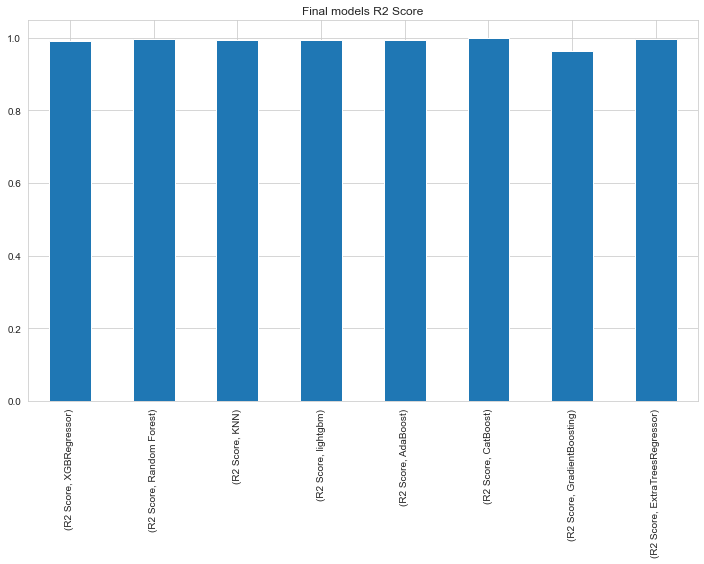

In [32]:
allacc.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Final models R2 Score')

# Explainable AI

# Lime

In [33]:
import lime
import lime.lime_tabular

In [34]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=features, class_names=target,mode='regression')


In [35]:
exp = explainer.explain_instance(X_test.iloc[8],model6.predict,num_features=10,top_labels=1)

C:\Users\My Laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\My Laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\My Laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys 

In [36]:
exp

In [38]:
exp.show_in_notebook(show_table=True, show_all=True, predict_proba=False)

In [ ]:
#verify our sample
X_test.iloc[8]

In [ ]:
exp = explainer.explain_instance(X_test.iloc[10],model6.predict,num_features=10,top_labels=1)

In [ ]:
exp.show_in_notebook(show_table=True, show_all=False,)

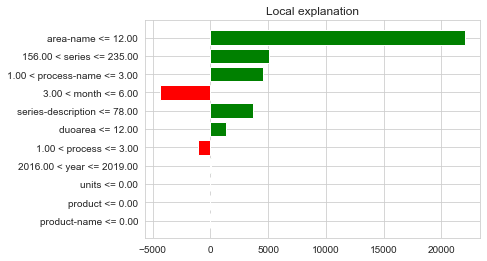

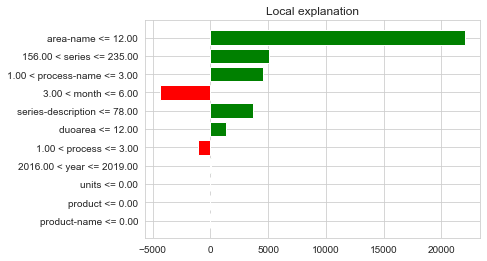

In [28]:
exp.as_pyplot_figure()

# Shap

In [39]:
import shap

In [ ]:
explainer = shap.Explainer(model6, masker=X_train, feature_names=features)
shap.initjs()
shap_values = explainer(X_test)

 24%|=====               | 1793/7599 [258:33<837:13]       

# waterfall Plot

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.plots.waterfall(shap_values[0], max_display=4) #Waterfall plot for first observation

# Force Plot

In [ ]:
shap.plots.force(shap_values[0])

# Stacked Force Plot

In [ ]:
shap.plots.force(shap_values[0:100])

# Absolute Mean Shap

In [ ]:
shap.plots.bar(shap_values)

# Beeswarm Plot

In [ ]:
shap.plots.beeswarm(shap_values)

# Dependeces Plot

In [ ]:
shap.plots.scatter(shap_values[:,'duoarea'])

In [ ]:
df.columns

In [ ]:
shap.plots.scatter(shap_values[:,'duoarea'], color=shap_values[:,"series"])

In [ ]:
shap.plots.scatter(shap_values[:,'process-name'])